# Name: ID:

In [48]:
import pandas as pd

df = pd.read_csv('ds_salaries.csv')

display(df.info())

display(df.describe(include='all'))

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### 1- There is no need for the id column (Unnamed: 0)
#### 2- All comparisons should be done in USD so there is no need for salary and salary_currency columns
#### 3- job_title should be encoded and grouped as (Scientists, Engineers, Analysts, Leads and managers, Archetics)
#### 4- remote_ratio should be modifed to (On-Site, Hybrid, Remote)
#### 5- company_location and employee_residence can be mapped by  external library (pycountry)
#### 6- employment_type breakdown is (Full-Time, Part-Time, Contract, Freelance)
#### 7- experience_level breakdown is (Entry-Level, Mid-Level, Senior-Level, Executive-Level)


#### Drop columns

In [49]:
df.drop(axis=1, columns=['Unnamed: 0', 'salary', 'salary_currency'], inplace=True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


None

In [50]:
employment_type_mapping = {'FT':0, 
               'PT':1, 
               'CT':2,
               'FL':3}
experience_level_mapping = {'EN':0, 
               'MI':1, 
               'SE':2,
               'EX':3}

df['remote_ratio'] = df['remote_ratio'].astype('str')
remote_ratio_mapping = {'100':2, 
               '50':1, 
               '0':0}
company_size_mapping = {'S':0, 
               'M':1, 
               'L':2}

df['employment_type'] = df['employment_type'].map(employment_type_mapping)
df['experience_level'] = df['experience_level'].map(experience_level_mapping)
df['remote_ratio'] = df['remote_ratio'].map(remote_ratio_mapping)
df['company_size'] = df['company_size'].map(company_size_mapping)


import pycountry as ct

df['employee_residence'] = df['employee_residence'].apply(lambda x: ct.countries.get(alpha_2= x).name)
df['company_location'] = df['company_location'].apply(lambda x: ct.countries.get(alpha_2= x).name)


df['work_year'] = df['work_year'].astype('str')
worke_year_mapping = {'2020':0, 
               '2021':1, 
               '2022':2}


# 0 : Scientist, 1: Engineer, 2: Analyst, 3: Manager, 4: Develpoer, 5: Architect

# job_title_mapping = {'Data Scientist':0,'Machine Learning Scientist':0 ,'Big Data Engineer':1, 'Product Data Analyst':2, 'Machine Learning Engineer':1,
#               'Data Analyst':2, 'Lead Data Scientist':0, 'Business Data Analyst':2, 'Lead Data Engineer':1,
#               'Lead Data Analyst':2, 'Data Engineer':1, 'Data Science Consultant':2,
#               'BI Data Analyst':2, 'Research Scientist':0, 'Machine Learning Manager':3, 'Data Engineering Manager':3,
#               'Machine Learning Infrastructure Engineer':1, 'ML Engineer':1, 'AI Scientist':0, 'Computer Vision Engineer':1,
#               'Principal Data Scientist':0, 'Data Science Manager':3, '3D Computer Vision Researcher':0, 'Data Analytics Engineer':1,
#               'Applied Data Scientist':0, 'Director of Data Science':3, 'Marketing Data Analyst':3, 'Cloud Data Engineer':1,
#               'Computer Vision Software Engineer':1, 'Director of Data Engineering':3, 'Data Science Engineer':1, 'Machine Learning Scientist':0,
#               'Machine Learning Developer':4, 'Applied Machine Learning Scientist':0, 'Data Analytics Manager':3, 'Head of Data Science':3,
#               'Data Specialist':0, 'Data Architect':5, 'Finance Data Analyst':2, 'Principal Data Engineer':1,
#               'Principal Data Analyst':2, 'Big Data Architect':5, 'Staff Data Scientist':0, 'Head of Data':3,
#               'Analytics Engineer':1, 'ETL Developer':4, 'Head of Machine Learning':3, 'NLP Engineer':1,
#               'Lead Machine Learning Engineer':1, 'Financial Data Analyst':2, 'Data Analytics Lead': 3}


job_title_mapping = {'Data Scientist':'Scientist','Machine Learning Scientist':'Scientist' ,'Big Data Engineer':'Engineer', 'Product Data Analyst':'Analyst', 'Machine Learning Engineer':'Engineer',
              'Data Analyst':'Analyst', 'Lead Data Scientist':'Scientist', 'Business Data Analyst':'Analyst', 'Lead Data Engineer':'Engineer',
              'Lead Data Analyst':'Analyst', 'Data Engineer':'Engineer', 'Data Science Consultant':'Analyst',
              'BI Data Analyst':'Analyst', 'Research Scientist':'Scientist', 'Machine Learning Manager':'Manager', 'Data Engineering Manager':'Manager',
              'Machine Learning Infrastructure Engineer':'Engineer', 'ML Engineer':'Engineer', 'AI Scientist':'Scientist', 'Computer Vision Engineer':'Engineer',
              'Principal Data Scientist':'Scientist', 'Data Science Manager':'Manager', '3D Computer Vision Researcher':'Scientist', 'Data Analytics Engineer':'Engineer',
              'Applied Data Scientist':'Scientist', 'Director of Data Science':'Manager', 'Marketing Data Analyst':'Analyst', 'Cloud Data Engineer':'Engineer',
              'Computer Vision Software Engineer':'Engineer', 'Director of Data Engineering':'Manager', 'Data Science Engineer':'Engineer', 'Machine Learning Scientist':'Scientist',
              'Machine Learning Developer':'Developer', 'Applied Machine Learning Scientist':'Scientist', 'Data Analytics Manager':'Manager', 'Head of Data Science':'Manager',
              'Data Specialist':'Scientist', 'Data Architect':'Architect', 'Finance Data Analyst':'Analyst', 'Principal Data Engineer':'Engineer',
              'Principal Data Analyst':'Analyst', 'Big Data Architect':'Architect', 'Staff Data Scientist':'Scientist', 'Head of Data':'Manager',
              'Analytics Engineer':'Engineer', 'ETL Developer':'Developer', 'Head of Machine Learning':'Manager', 'NLP Engineer':'Engineer',
              'Lead Machine Learning Engineer':'Engineer', 'Financial Data Analyst':'Analyst', 'Data Analytics Lead': 'Manager'}



df['job_title'] = df['job_title'].map(job_title_mapping)
df['work_year'] = df['work_year'].map(worke_year_mapping)

display(df)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,1,0,0,79833,Germany,0,Germany,2
1,0,2,0,0,260000,Japan,0,Japan,0
2,0,2,0,1,109024,United Kingdom,1,United Kingdom,1
3,0,1,0,2,20000,Honduras,0,Honduras,0
4,0,2,0,1,150000,United States,1,United States,2
...,...,...,...,...,...,...,...,...,...
602,2,2,0,1,154000,United States,2,United States,1
603,2,2,0,1,126000,United States,2,United States,1
604,2,2,0,2,129000,United States,0,United States,1
605,2,2,0,2,150000,United States,2,United States,1


#### Finding outliers and removing them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 605
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           541 non-null    int64 
 1   experience_level    541 non-null    int64 
 2   employment_type     541 non-null    int64 
 3   job_title           541 non-null    int64 
 4   salary_in_usd       541 non-null    int64 
 5   employee_residence  541 non-null    object
 6   remote_ratio        541 non-null    int64 
 7   company_location    541 non-null    object
 8   company_size        541 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 42.3+ KB


None

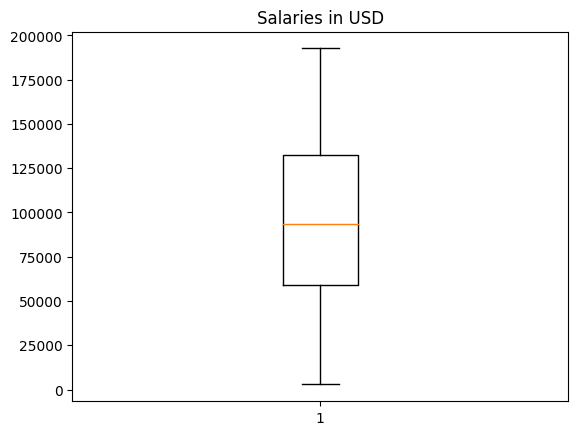

In [51]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q1 + 1.5 * IQR


df = df[(df['salary_in_usd'] < upper_whisker) & (df['salary_in_usd'] > lower_whisker)]

display(df.info())

import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(df['salary_in_usd']) 
plt.title('Salaries in USD')
plt.show()




In [52]:
import numpy as np
conditions = [(df['salary_in_usd']<=100000), (df['salary_in_usd']>100000)]
values = [0,
          1]
df['salary_range'] = np.select(conditions, values)

# Recall: Statstical info and description

In [53]:
display(df.info())
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 605
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           541 non-null    int64 
 1   experience_level    541 non-null    int64 
 2   employment_type     541 non-null    int64 
 3   job_title           541 non-null    int64 
 4   salary_in_usd       541 non-null    int64 
 5   employee_residence  541 non-null    object
 6   remote_ratio        541 non-null    int64 
 7   company_location    541 non-null    object
 8   company_size        541 non-null    int64 
 9   salary_range        541 non-null    int32 
dtypes: int32(1), int64(7), object(2)
memory usage: 44.4+ KB


None

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
count,541.000000,541.000000,541.000000,541.000000,541.000000,541,541.000000,541,541.000000,541.000000
unique,NaN,NaN,NaN,NaN,NaN,56,NaN,50,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,United States,NaN,United States,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,271,NaN,293,NaN,NaN
mean,1.391867,1.332717,0.051756,1.134935,95403.722736,NaN,1.399261,NaN,1.162662,0.441774
std,0.697780,0.769934,0.323611,1.065581,47551.128776,NaN,0.816224,NaN,0.657838,0.497058
min,0.000000,0.000000,0.000000,0.000000,2859.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,59102.000000,NaN,1.000000,NaN,1.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,93700.000000,NaN,2.000000,NaN,1.000000,0.000000
75%,2.000000,2.000000,0.000000,2.000000,132320.000000,NaN,2.000000,NaN,2.000000,1.000000


## Model Planning

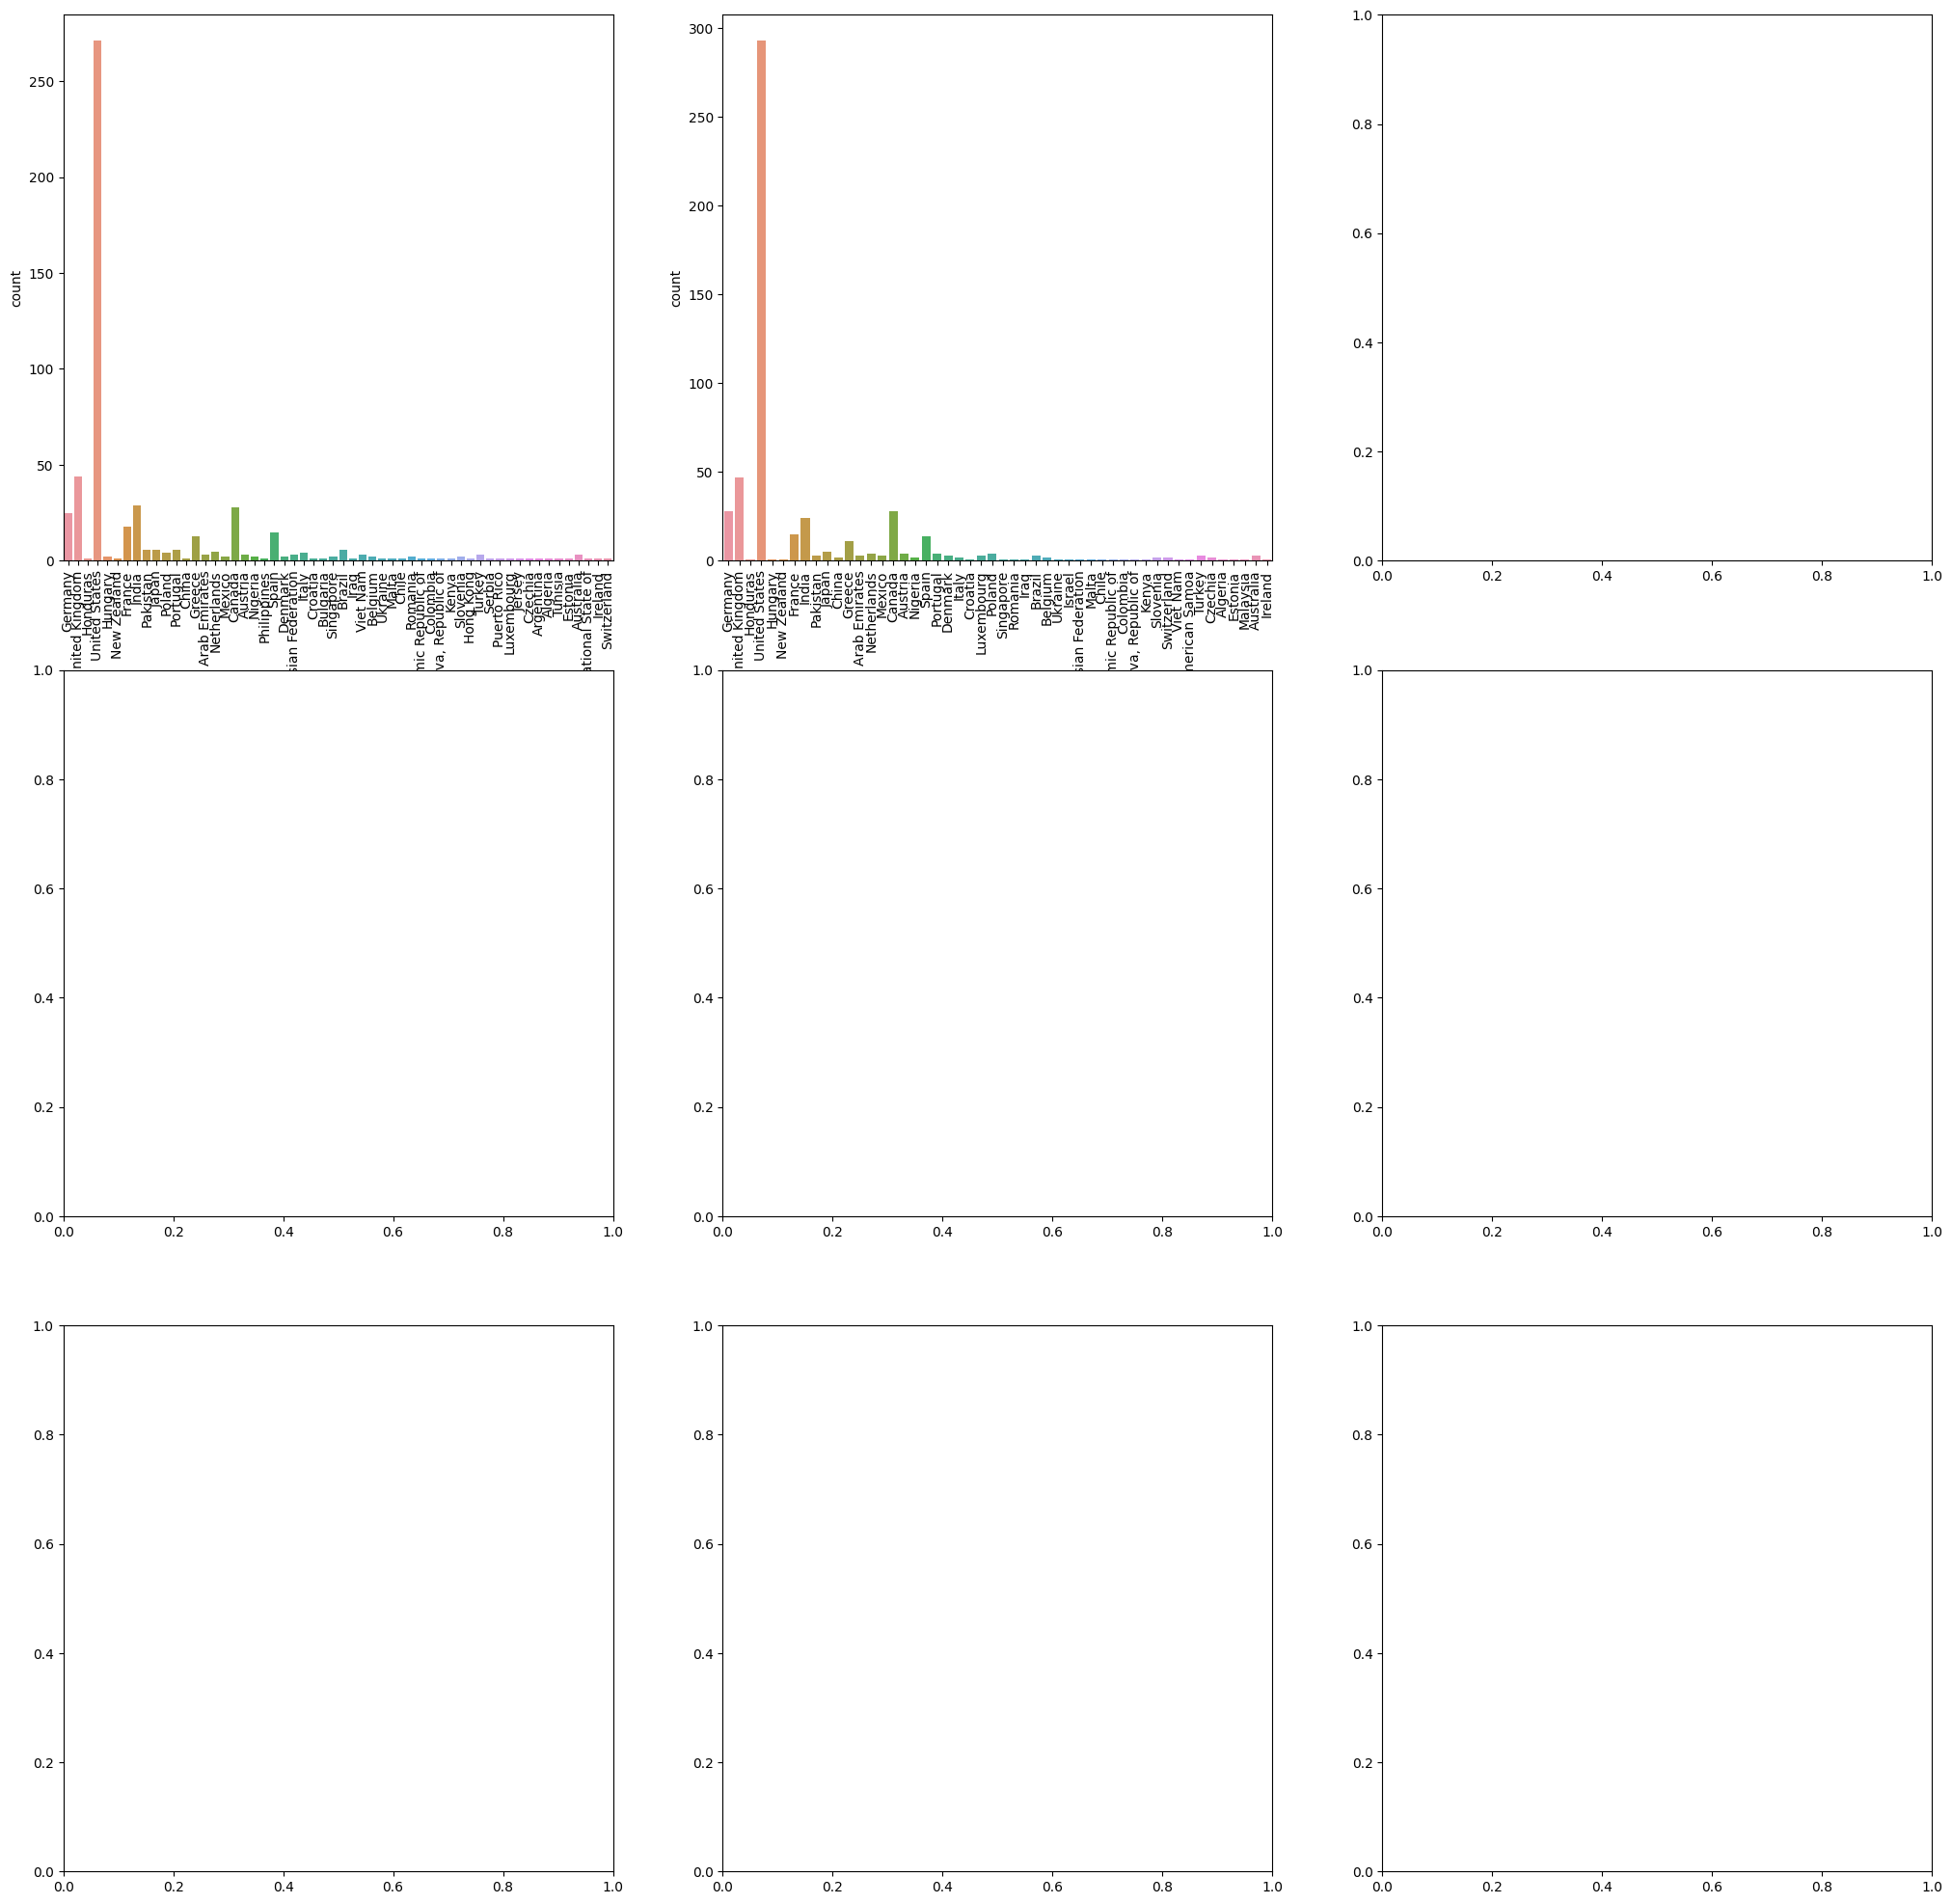

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns
kCols = 3
kRows = 3

fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()



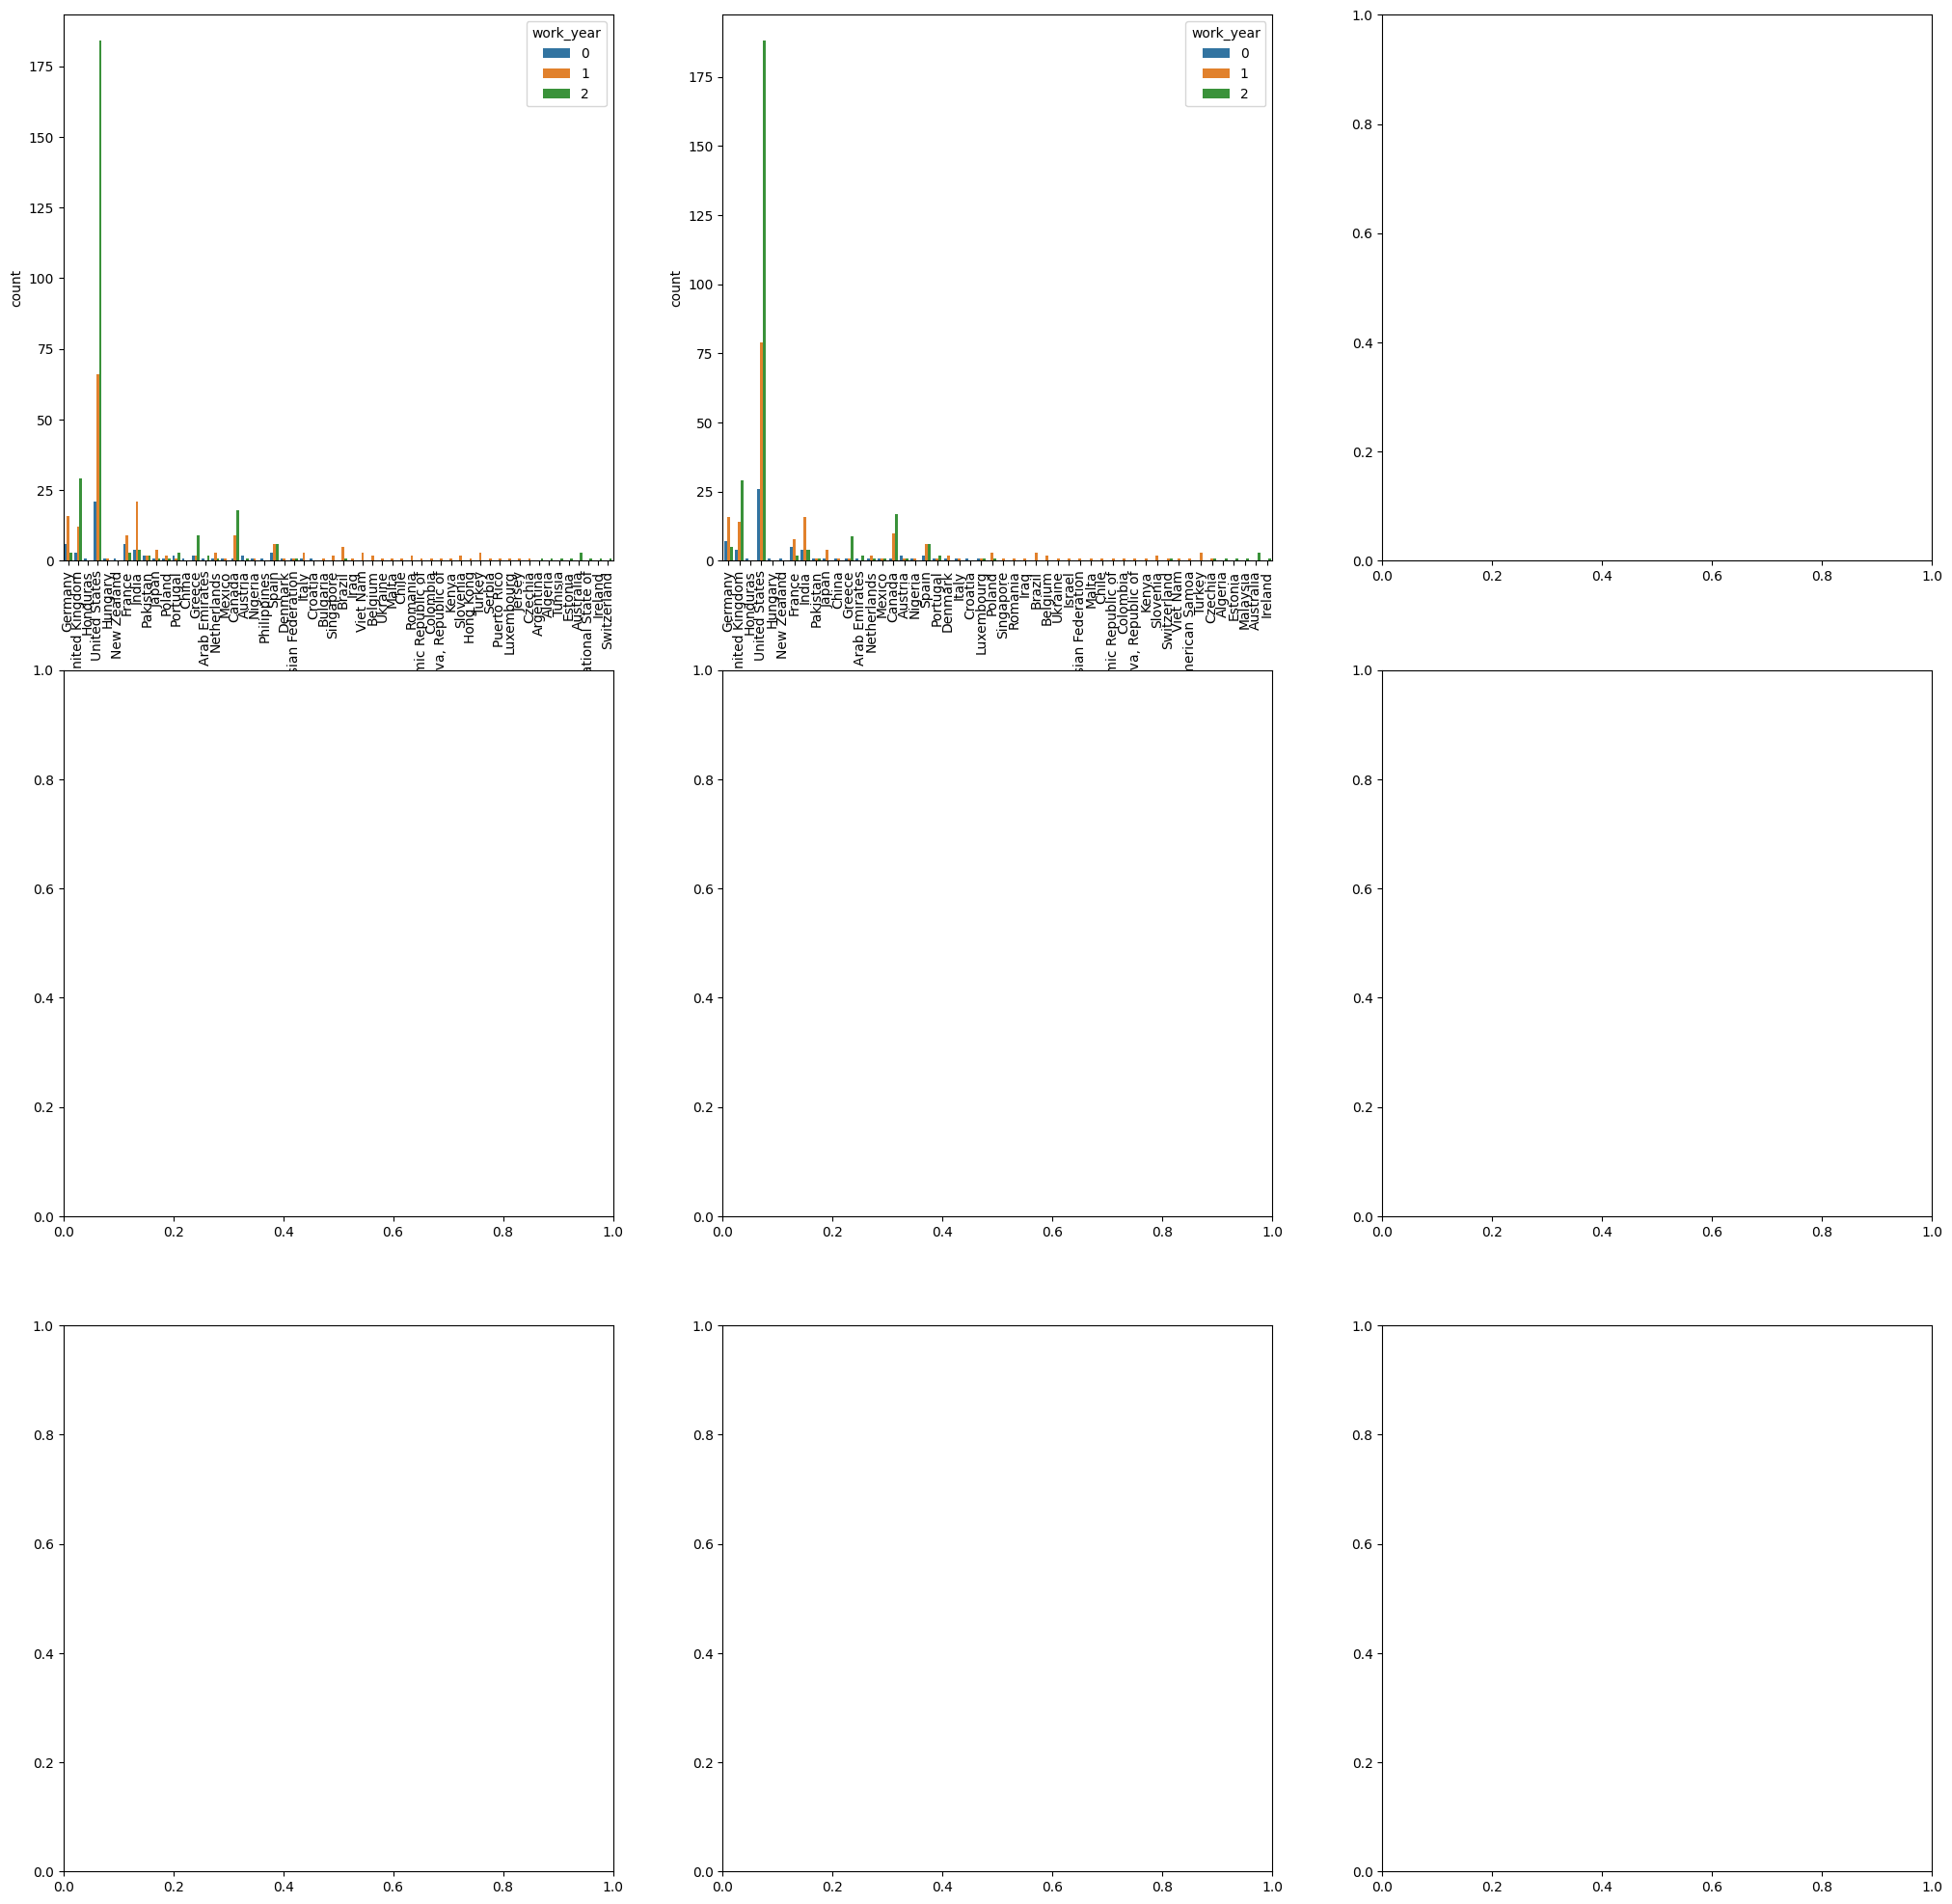

In [55]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='work_year', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

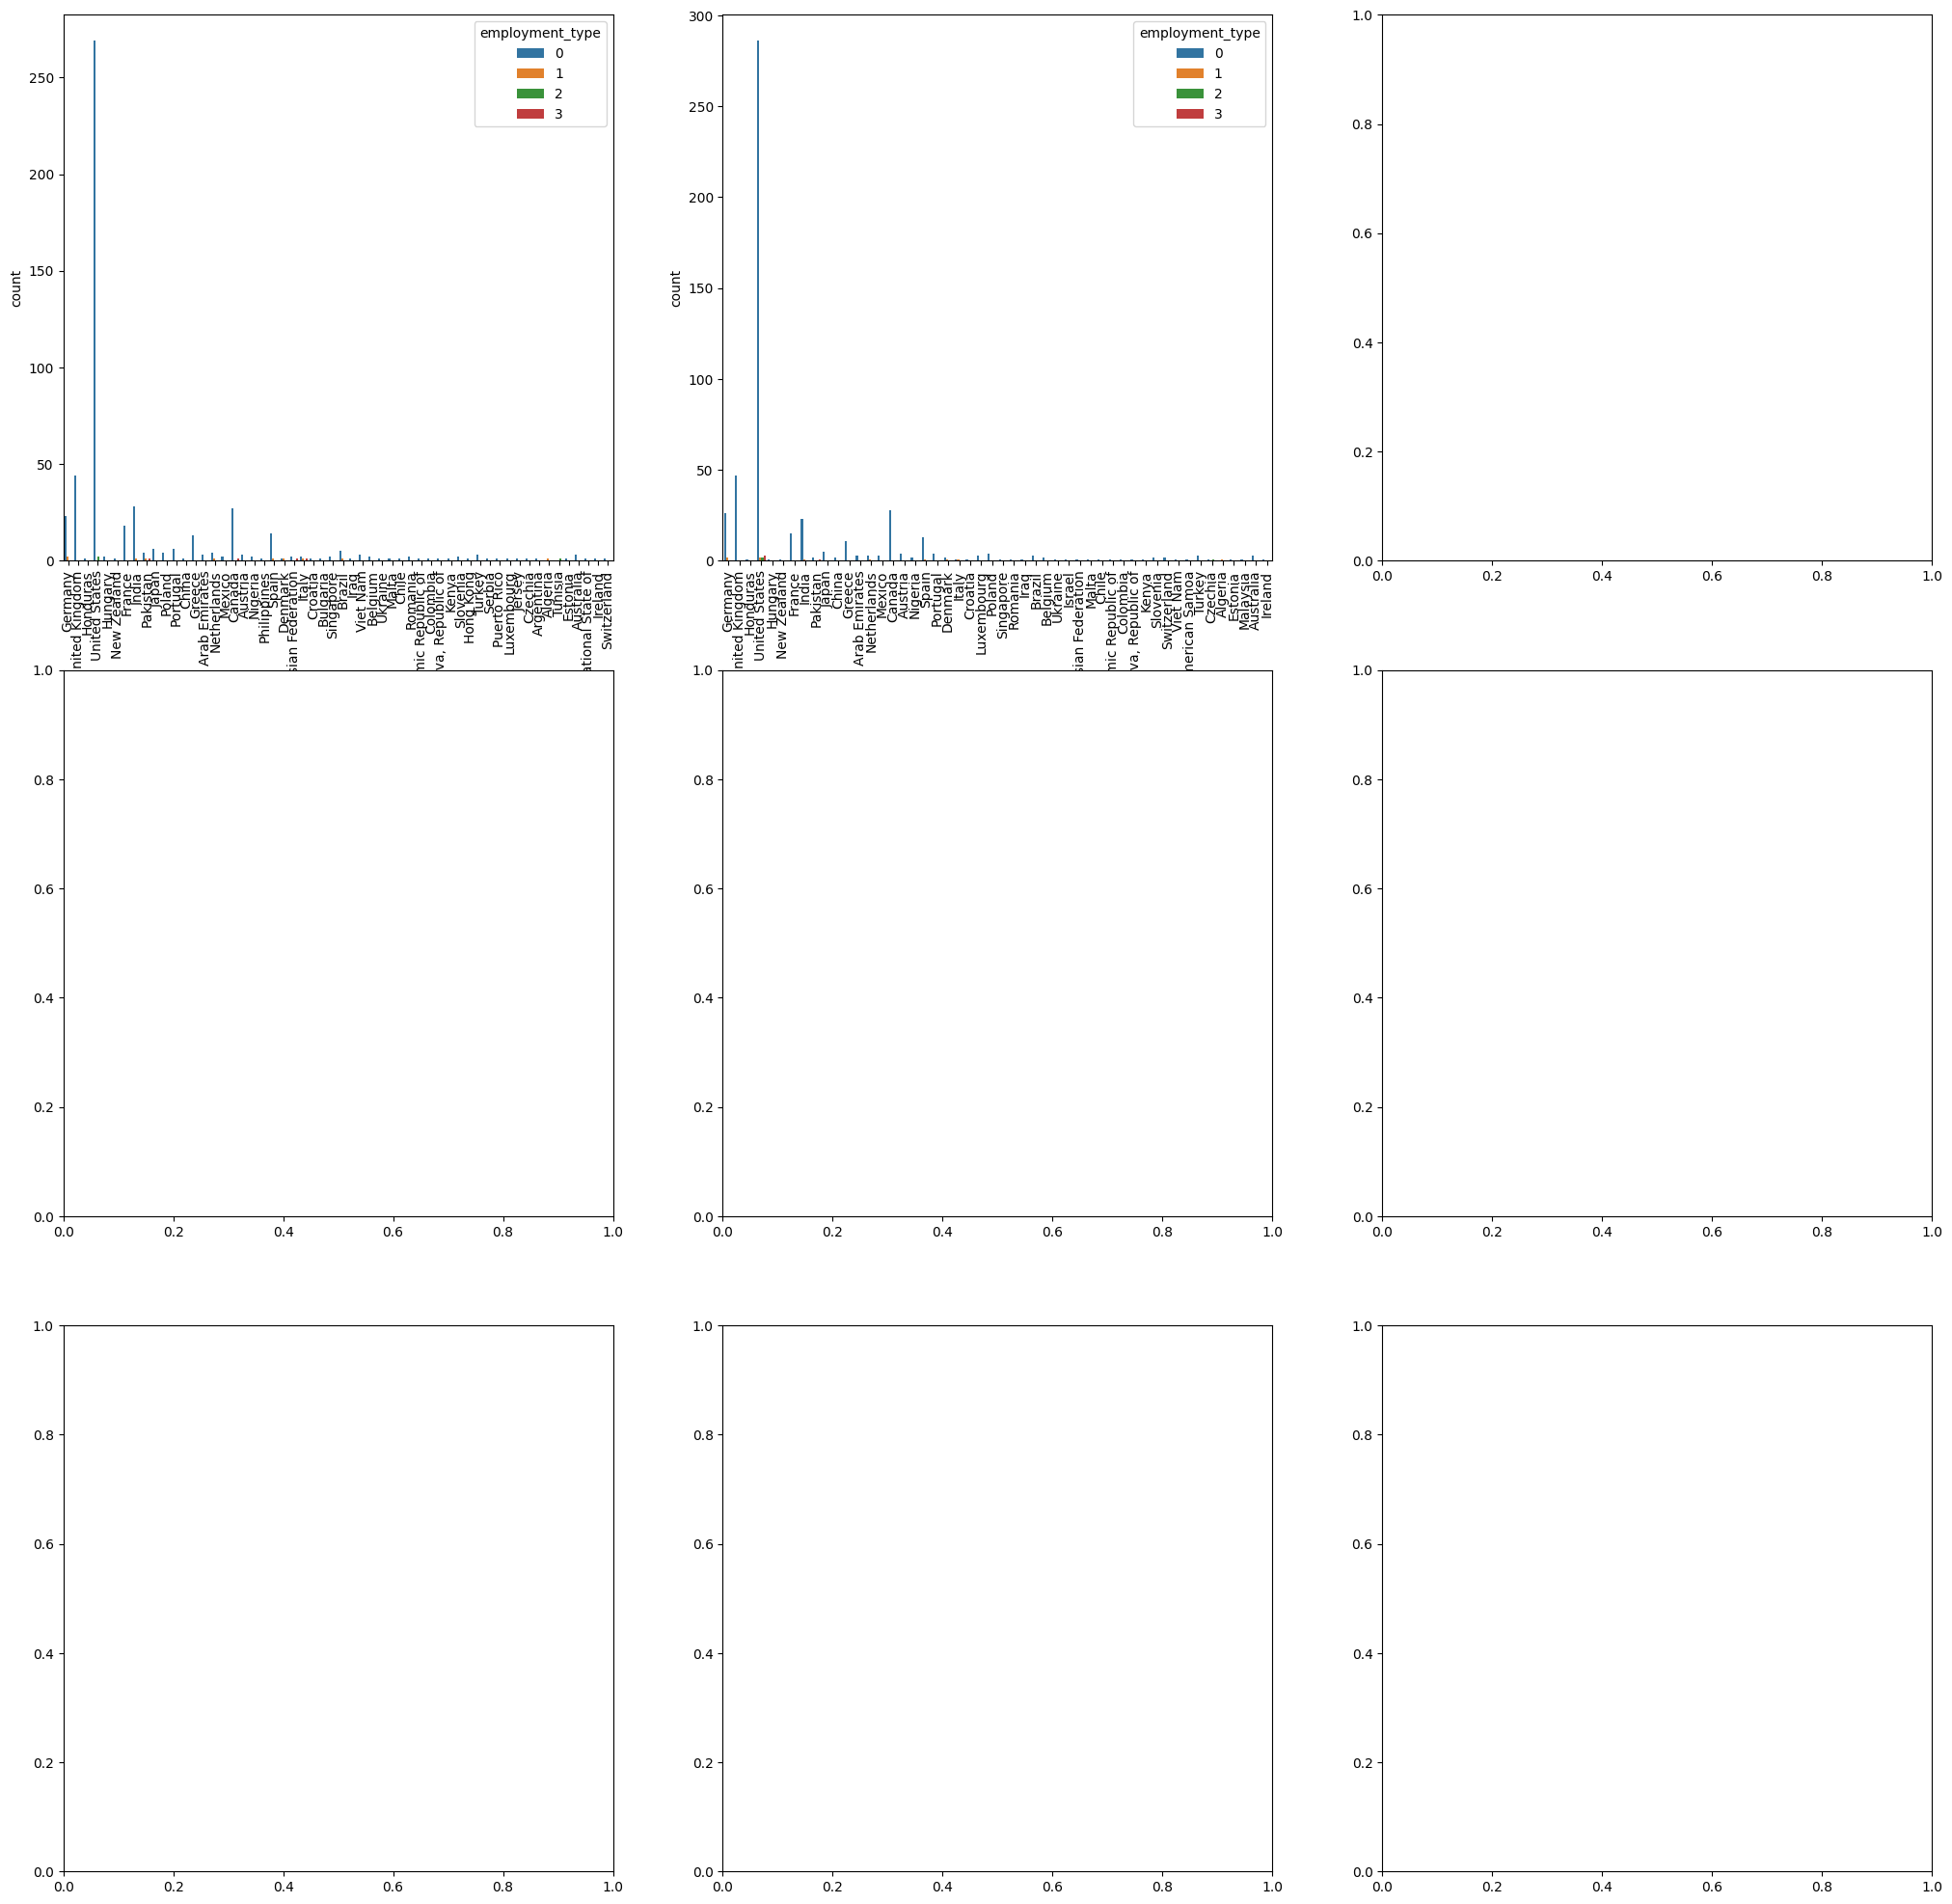

In [56]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='employment_type', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

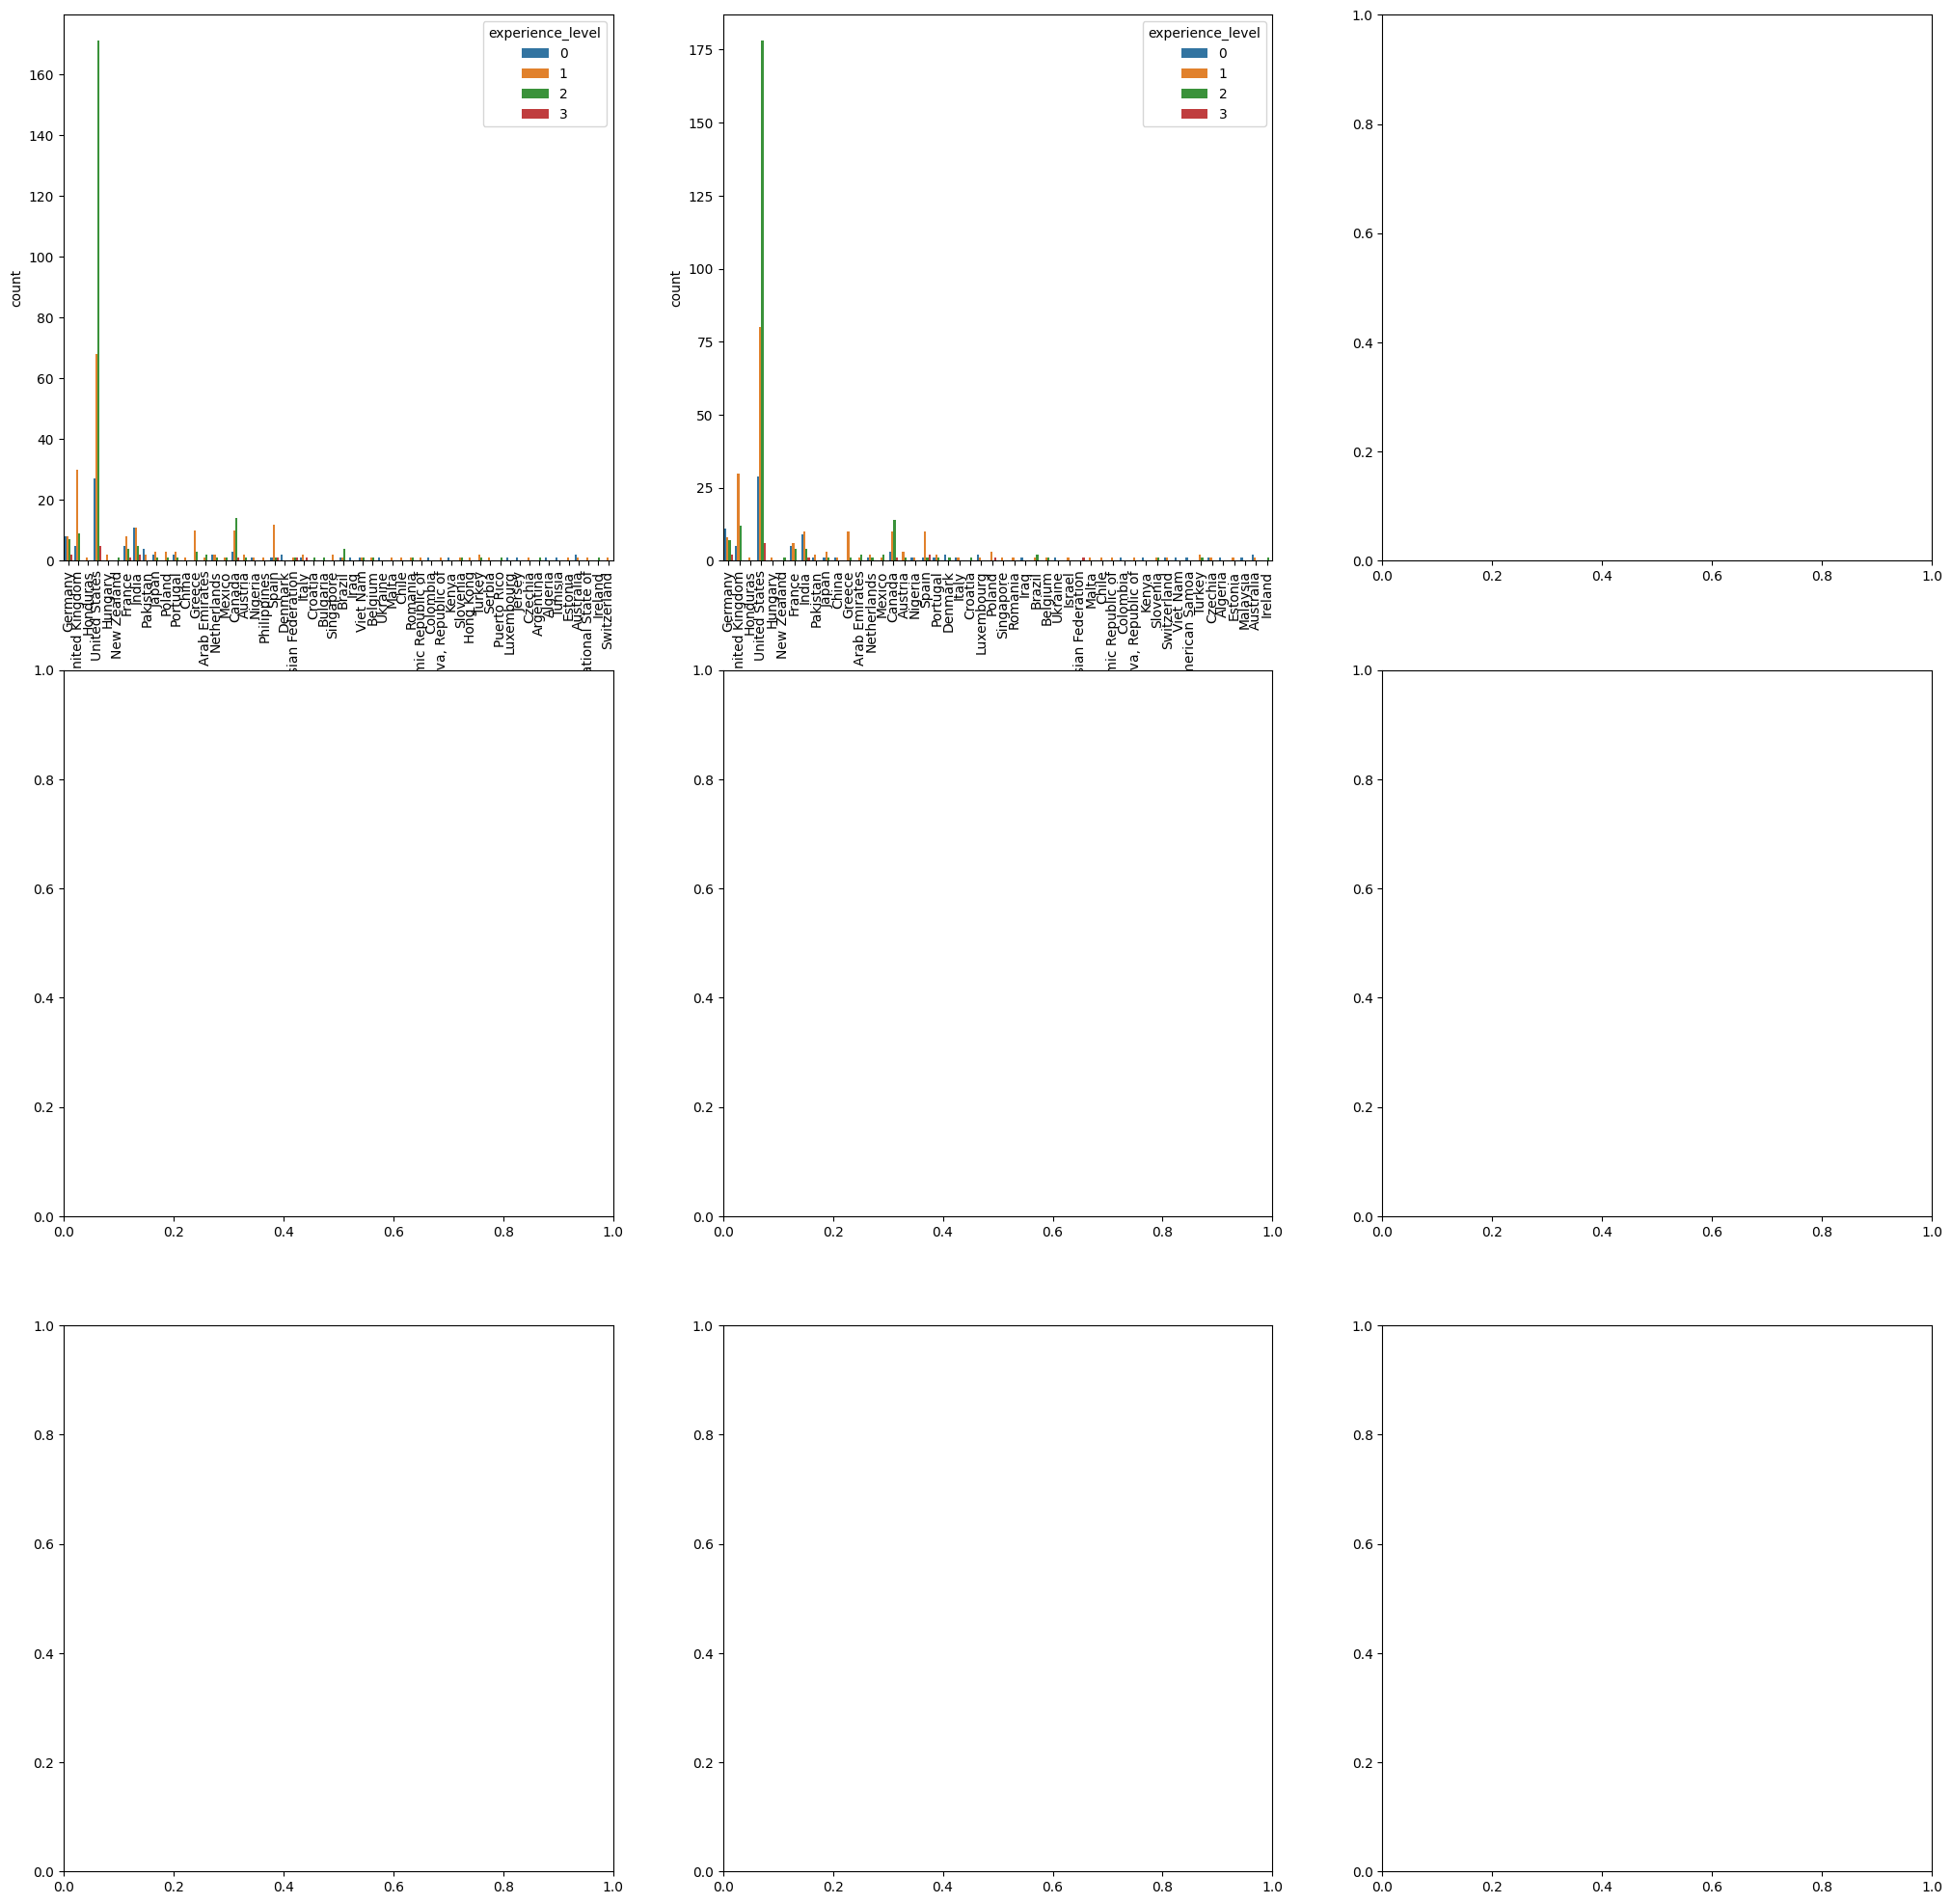

In [57]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='experience_level', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

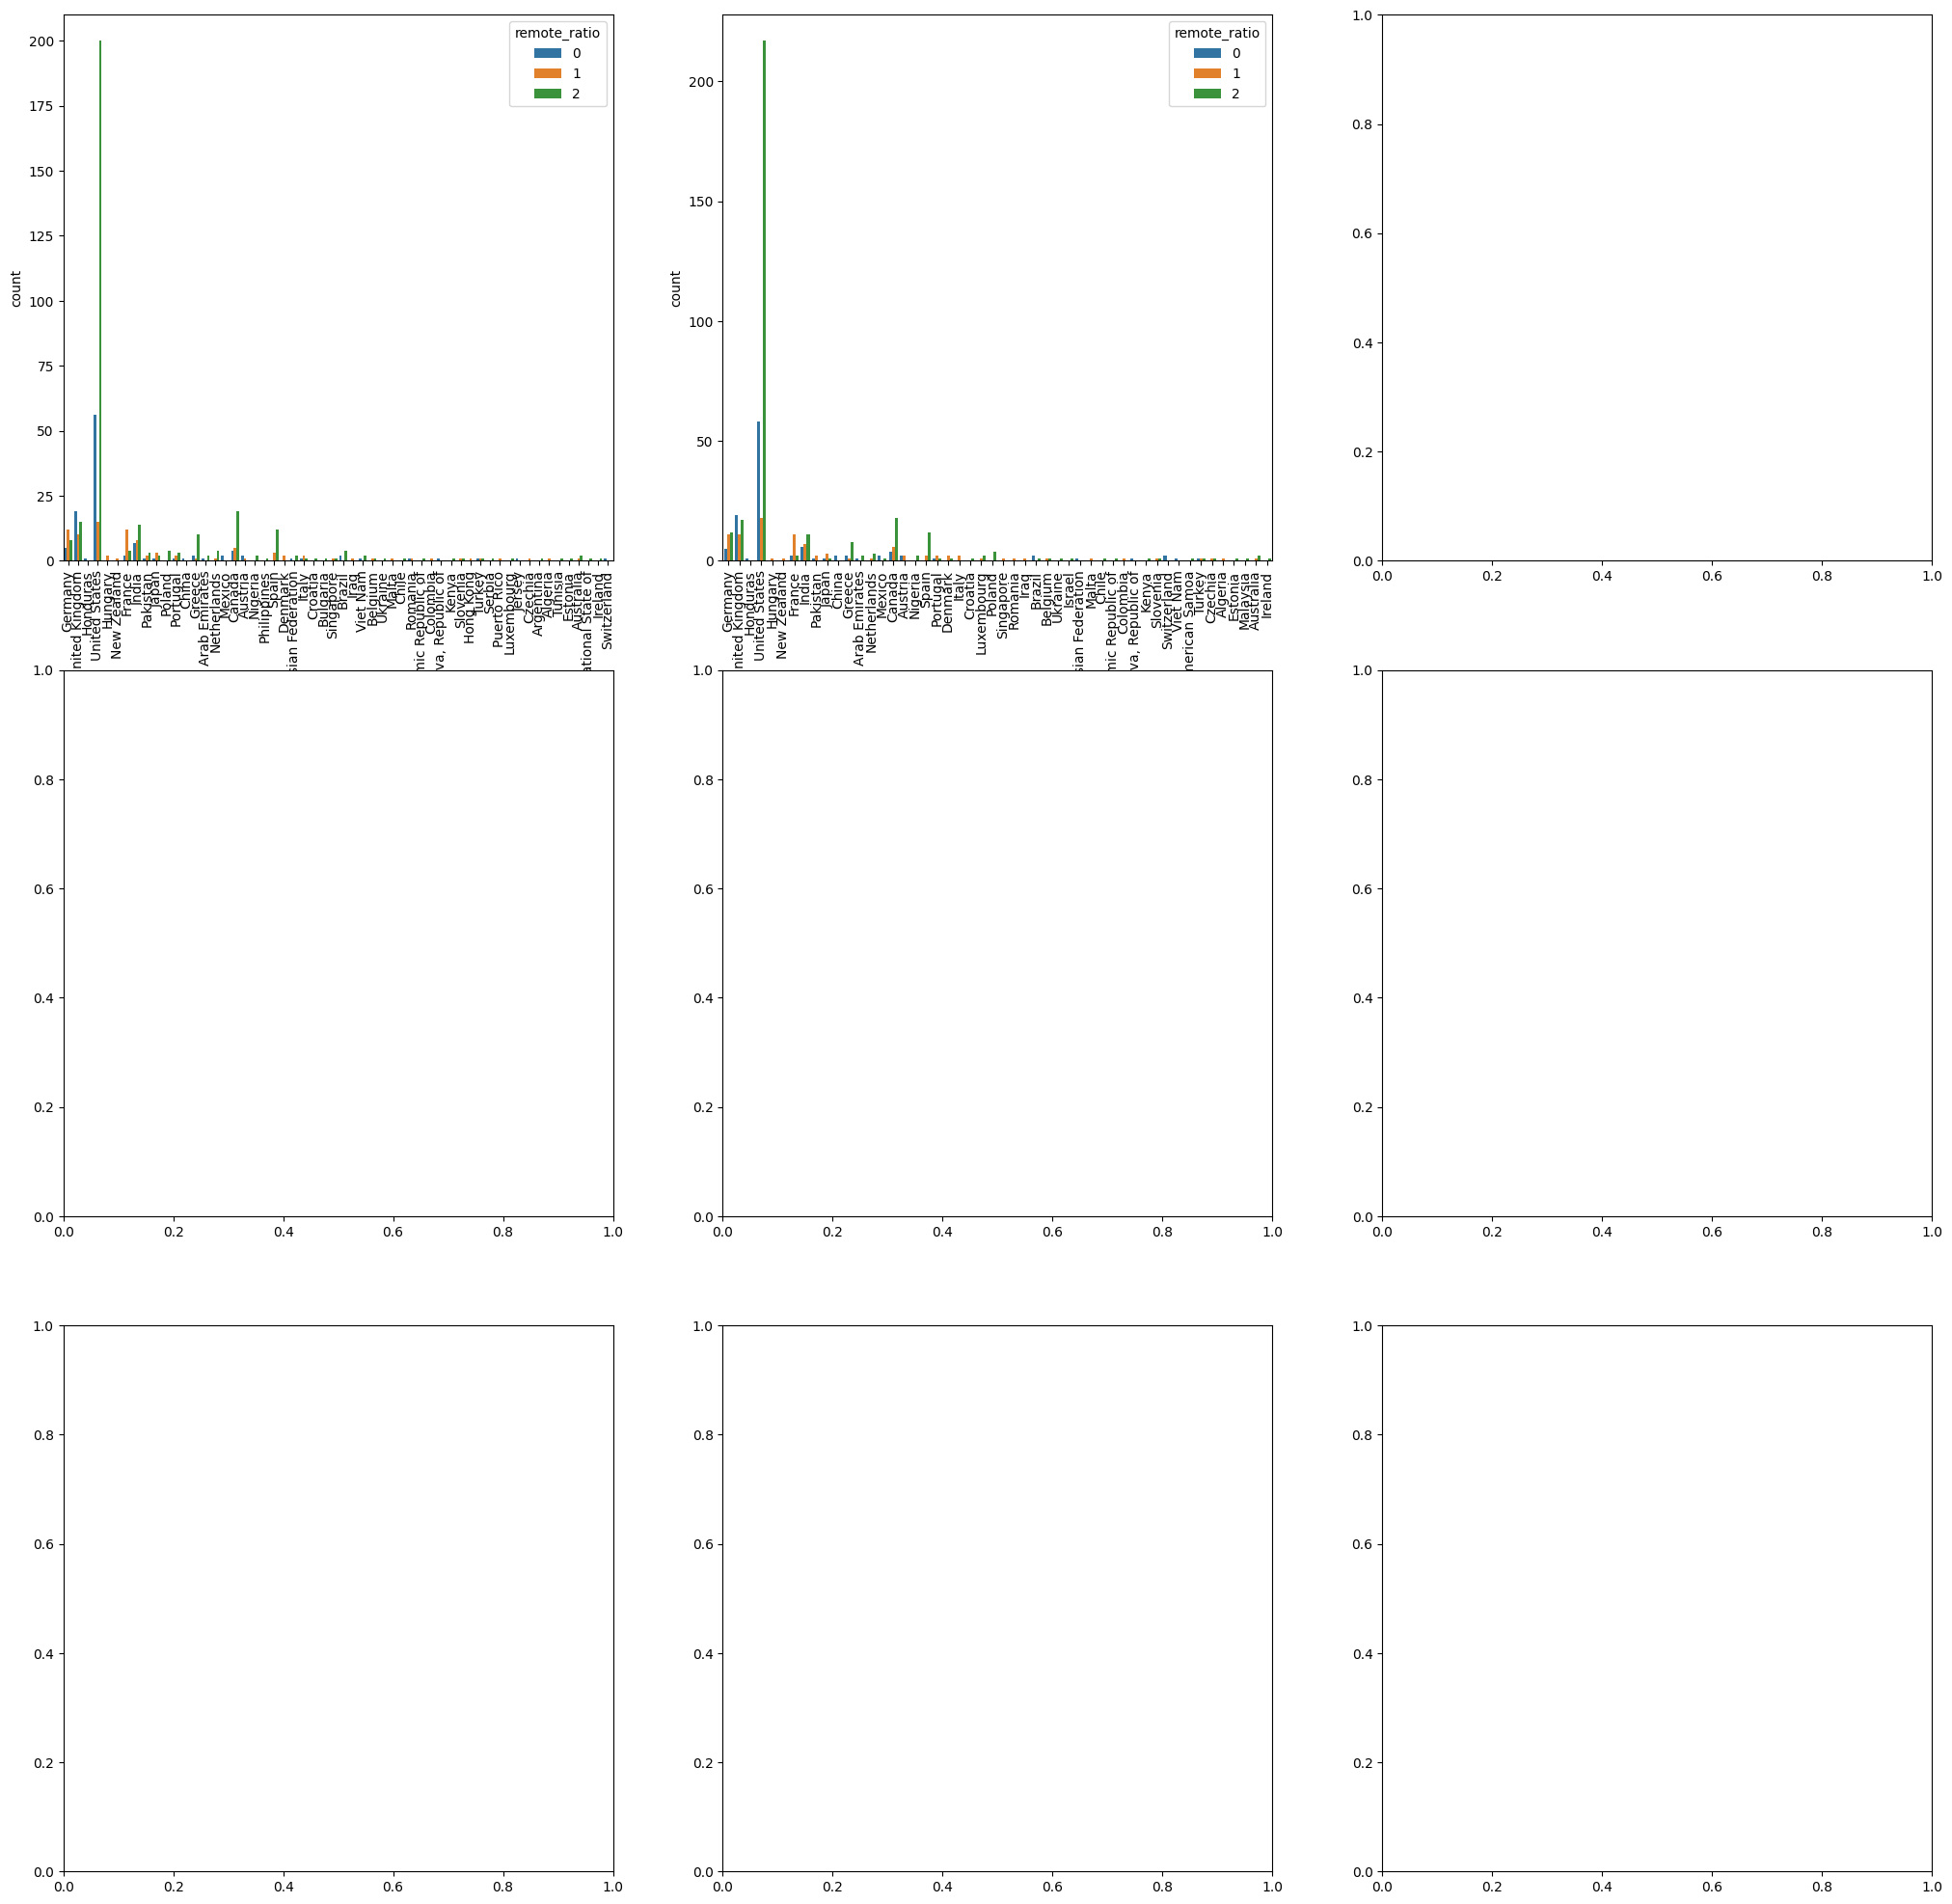

In [58]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='remote_ratio', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

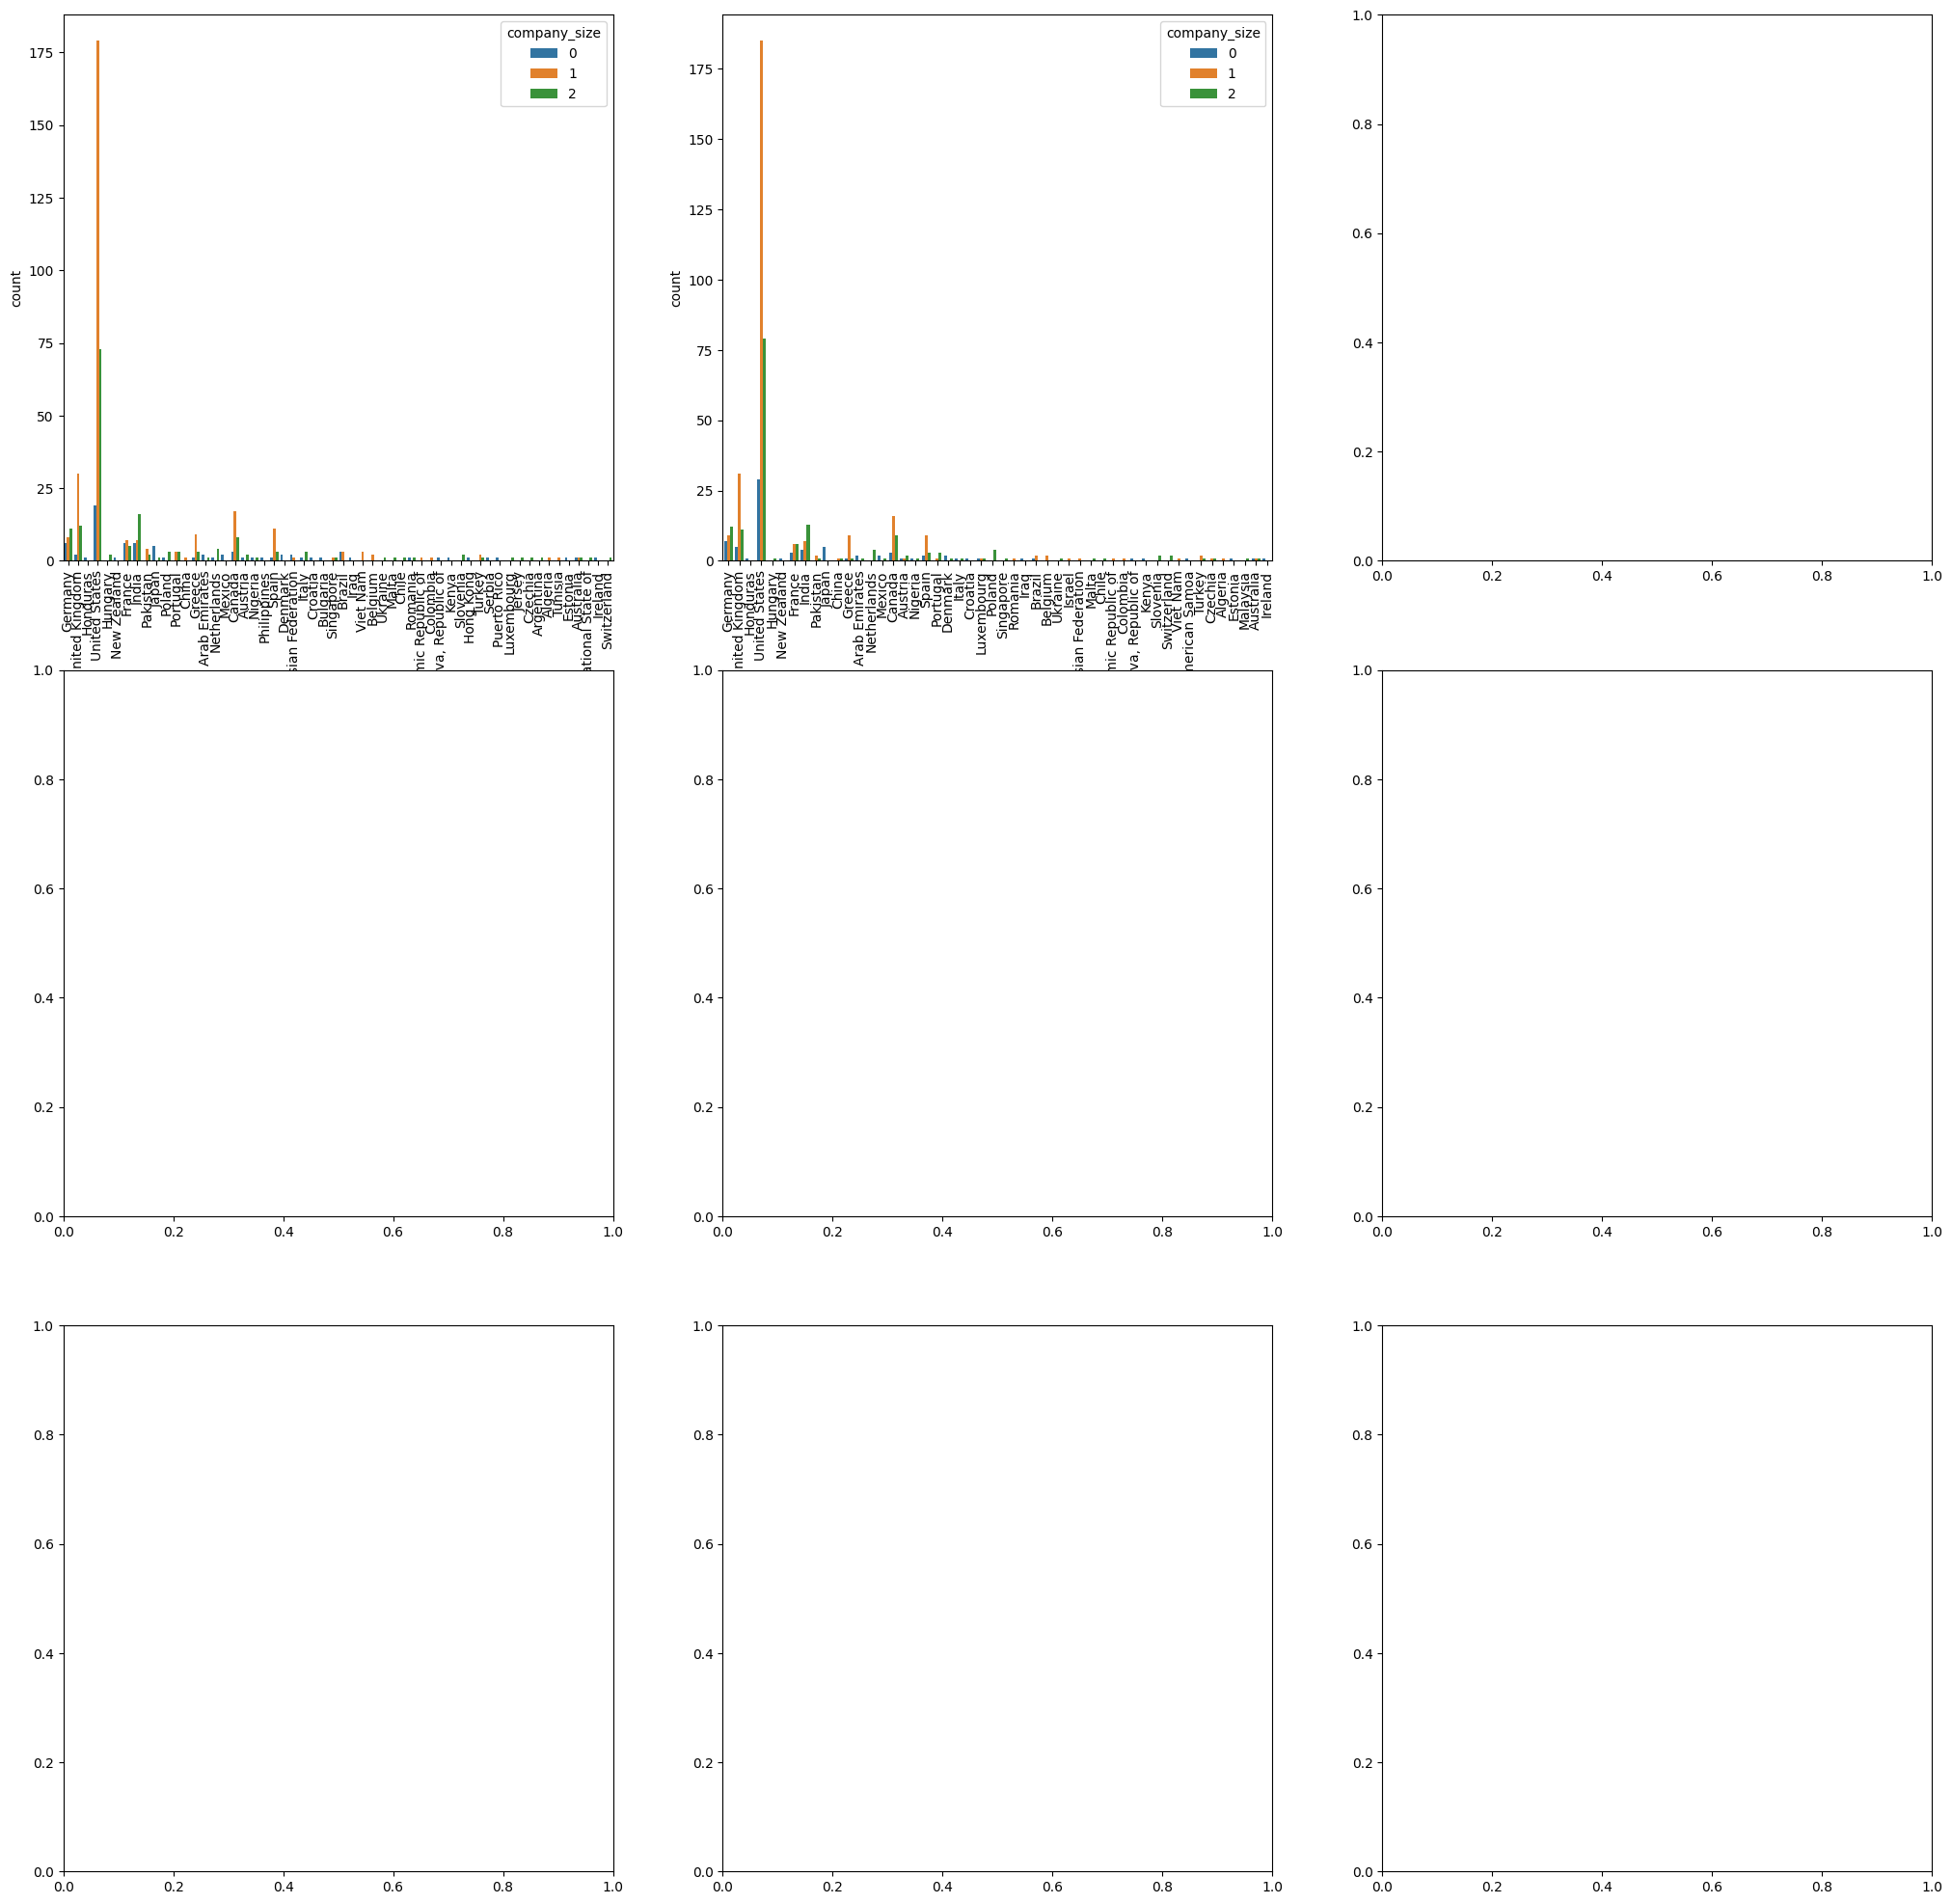

In [59]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='company_size', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

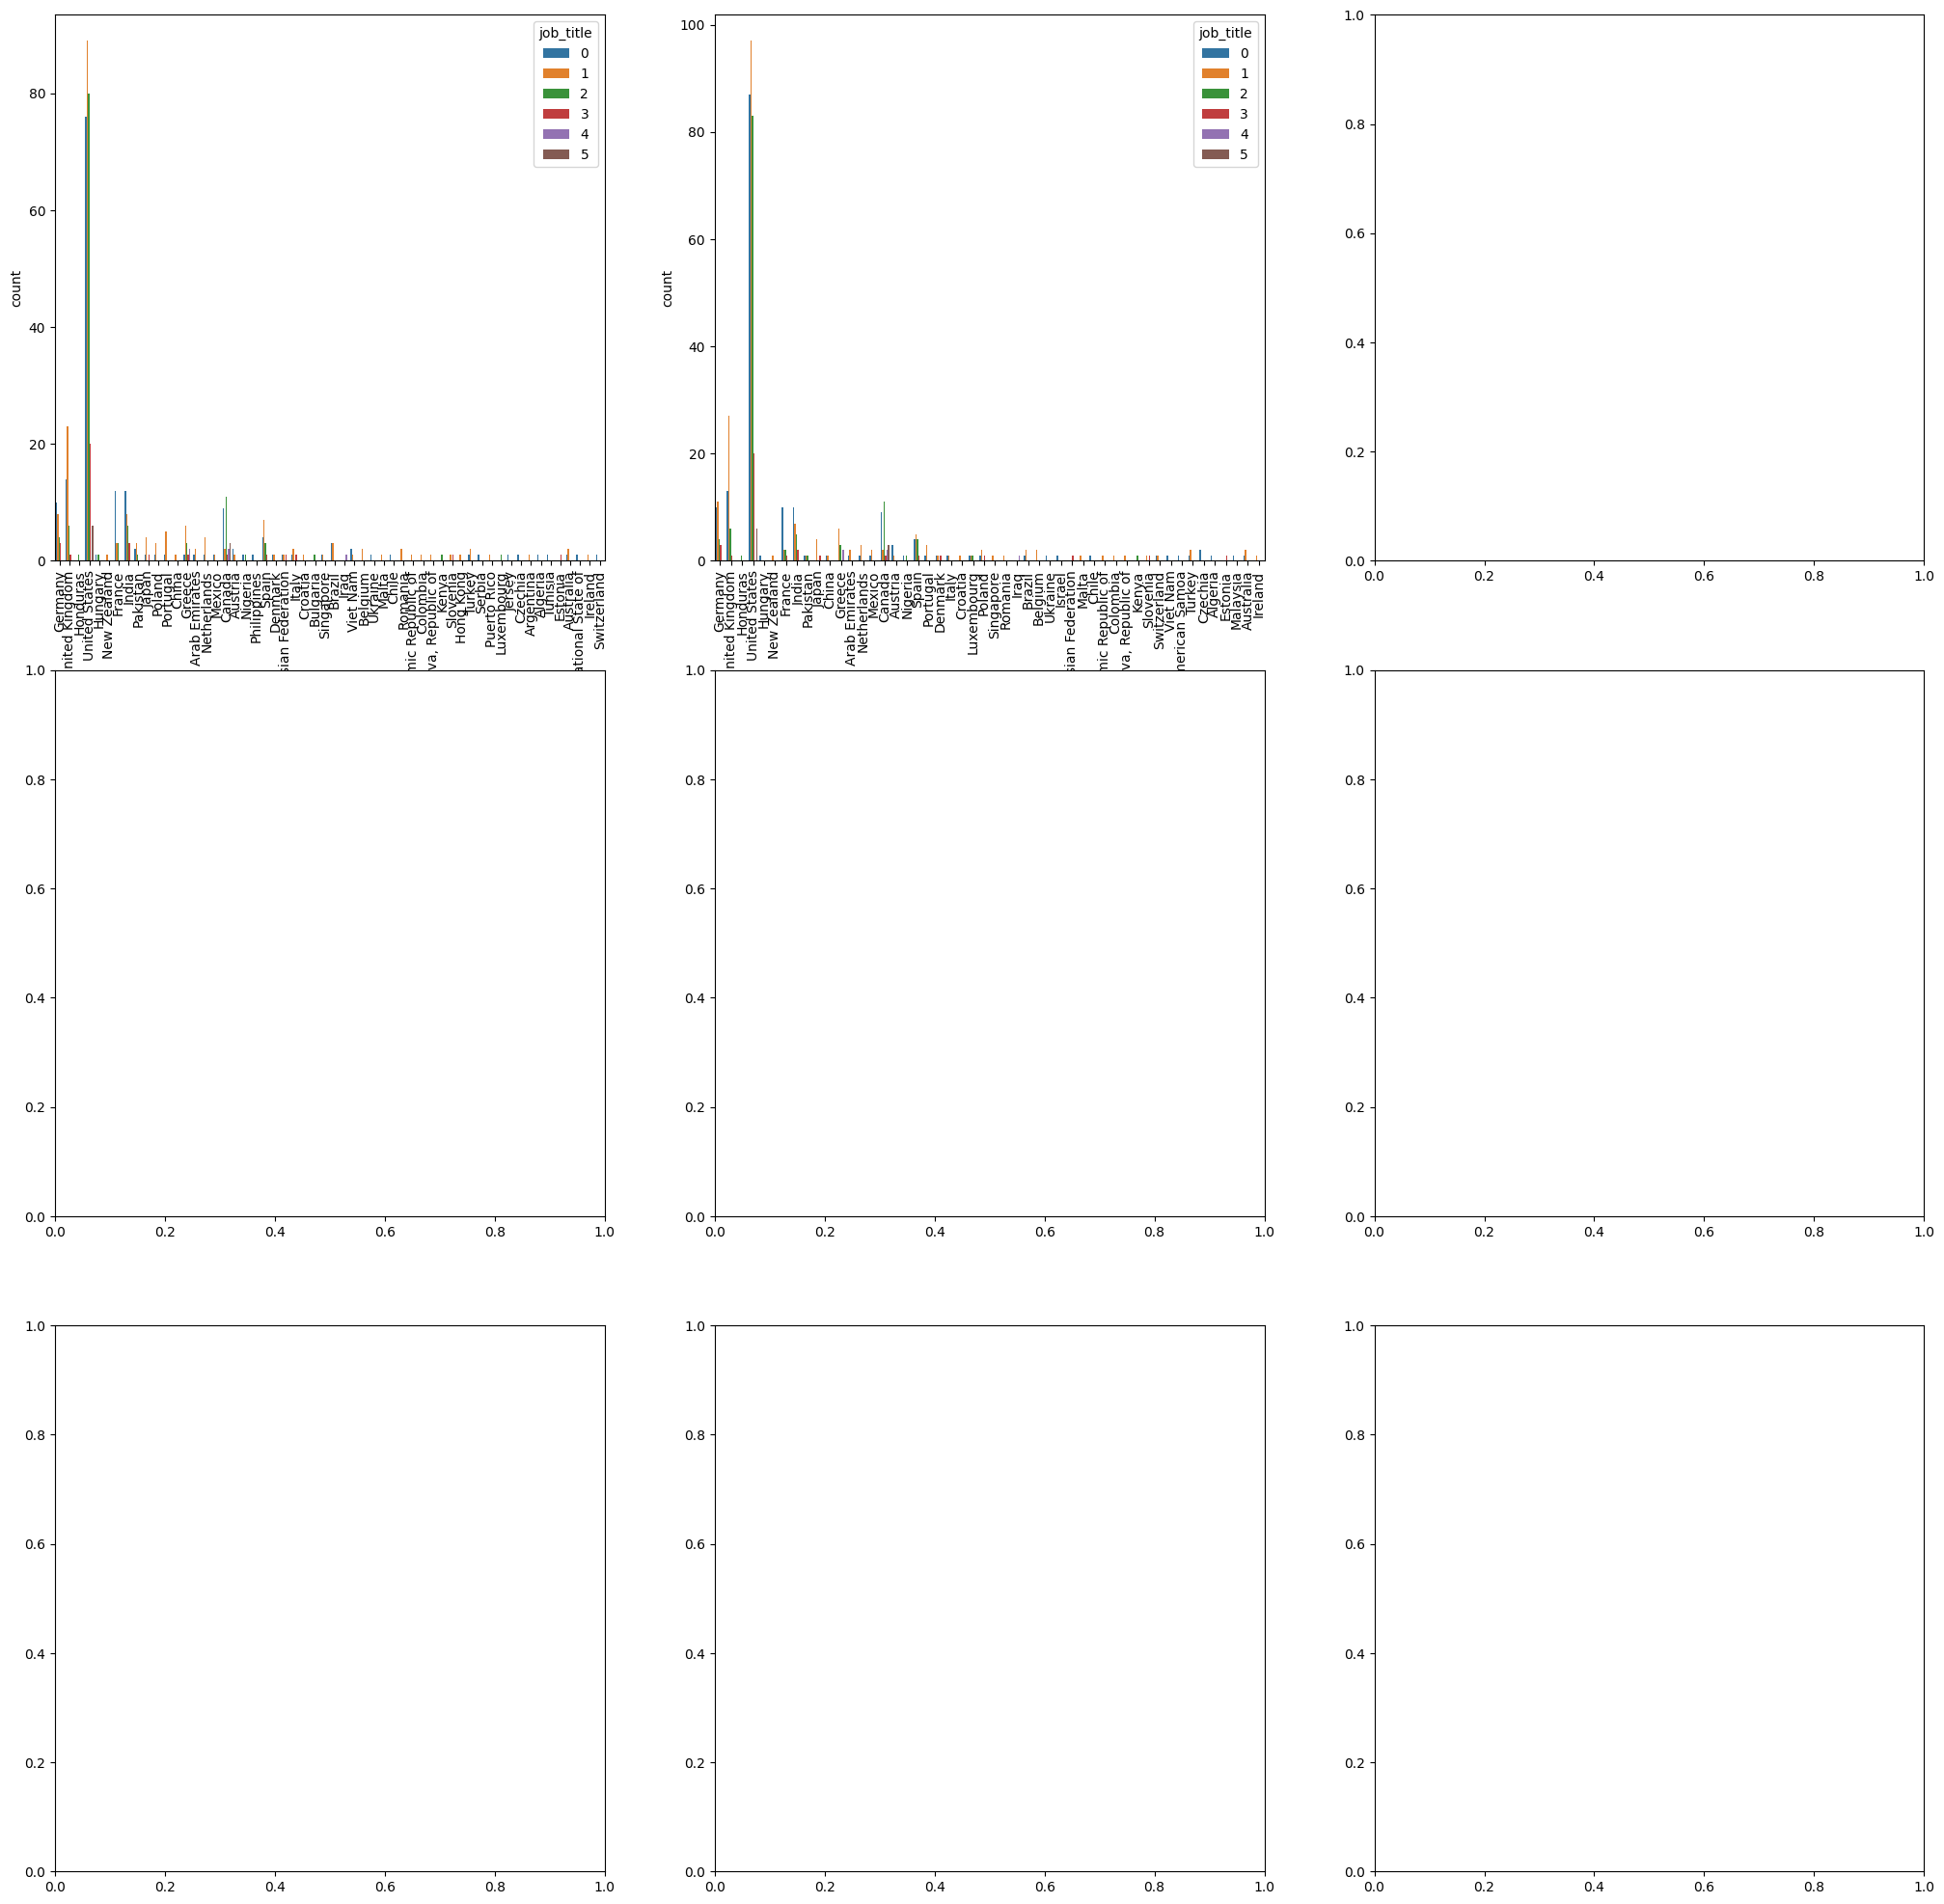

In [60]:
fig,axes = plt.subplots(kRows, kCols, figsize=(25,25))
for index,column in enumerate(categorical):
    axis=axes.flatten()[index]
    sns.countplot(x=column, hue='job_title', data=df, ax=axis)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
plt.show()

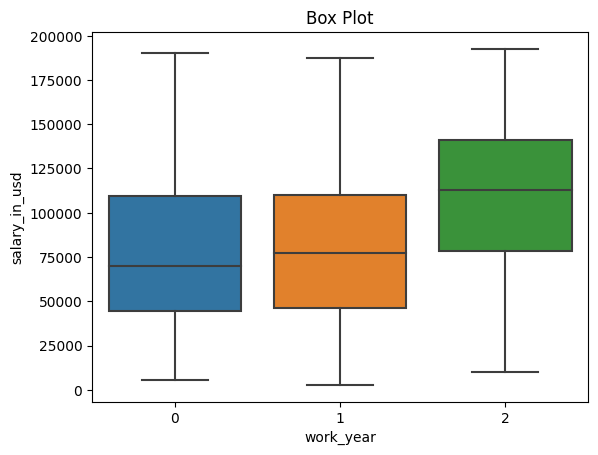

In [61]:


plt.figure()
sns.boxplot(x=df['work_year'], y=df['salary_in_usd'] ) 
plt.title('Box Plot')
plt.show()

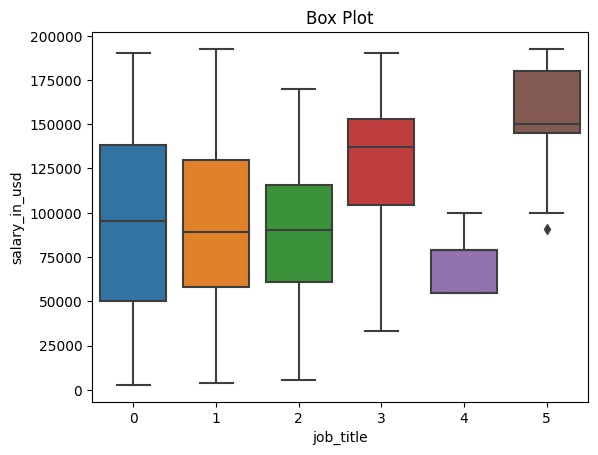

In [62]:
plt.figure()
sns.boxplot(x=df['job_title'], y=df['salary_in_usd'] ) 
plt.title('Box Plot')
plt.show()

<Figure size 640x480 with 0 Axes>

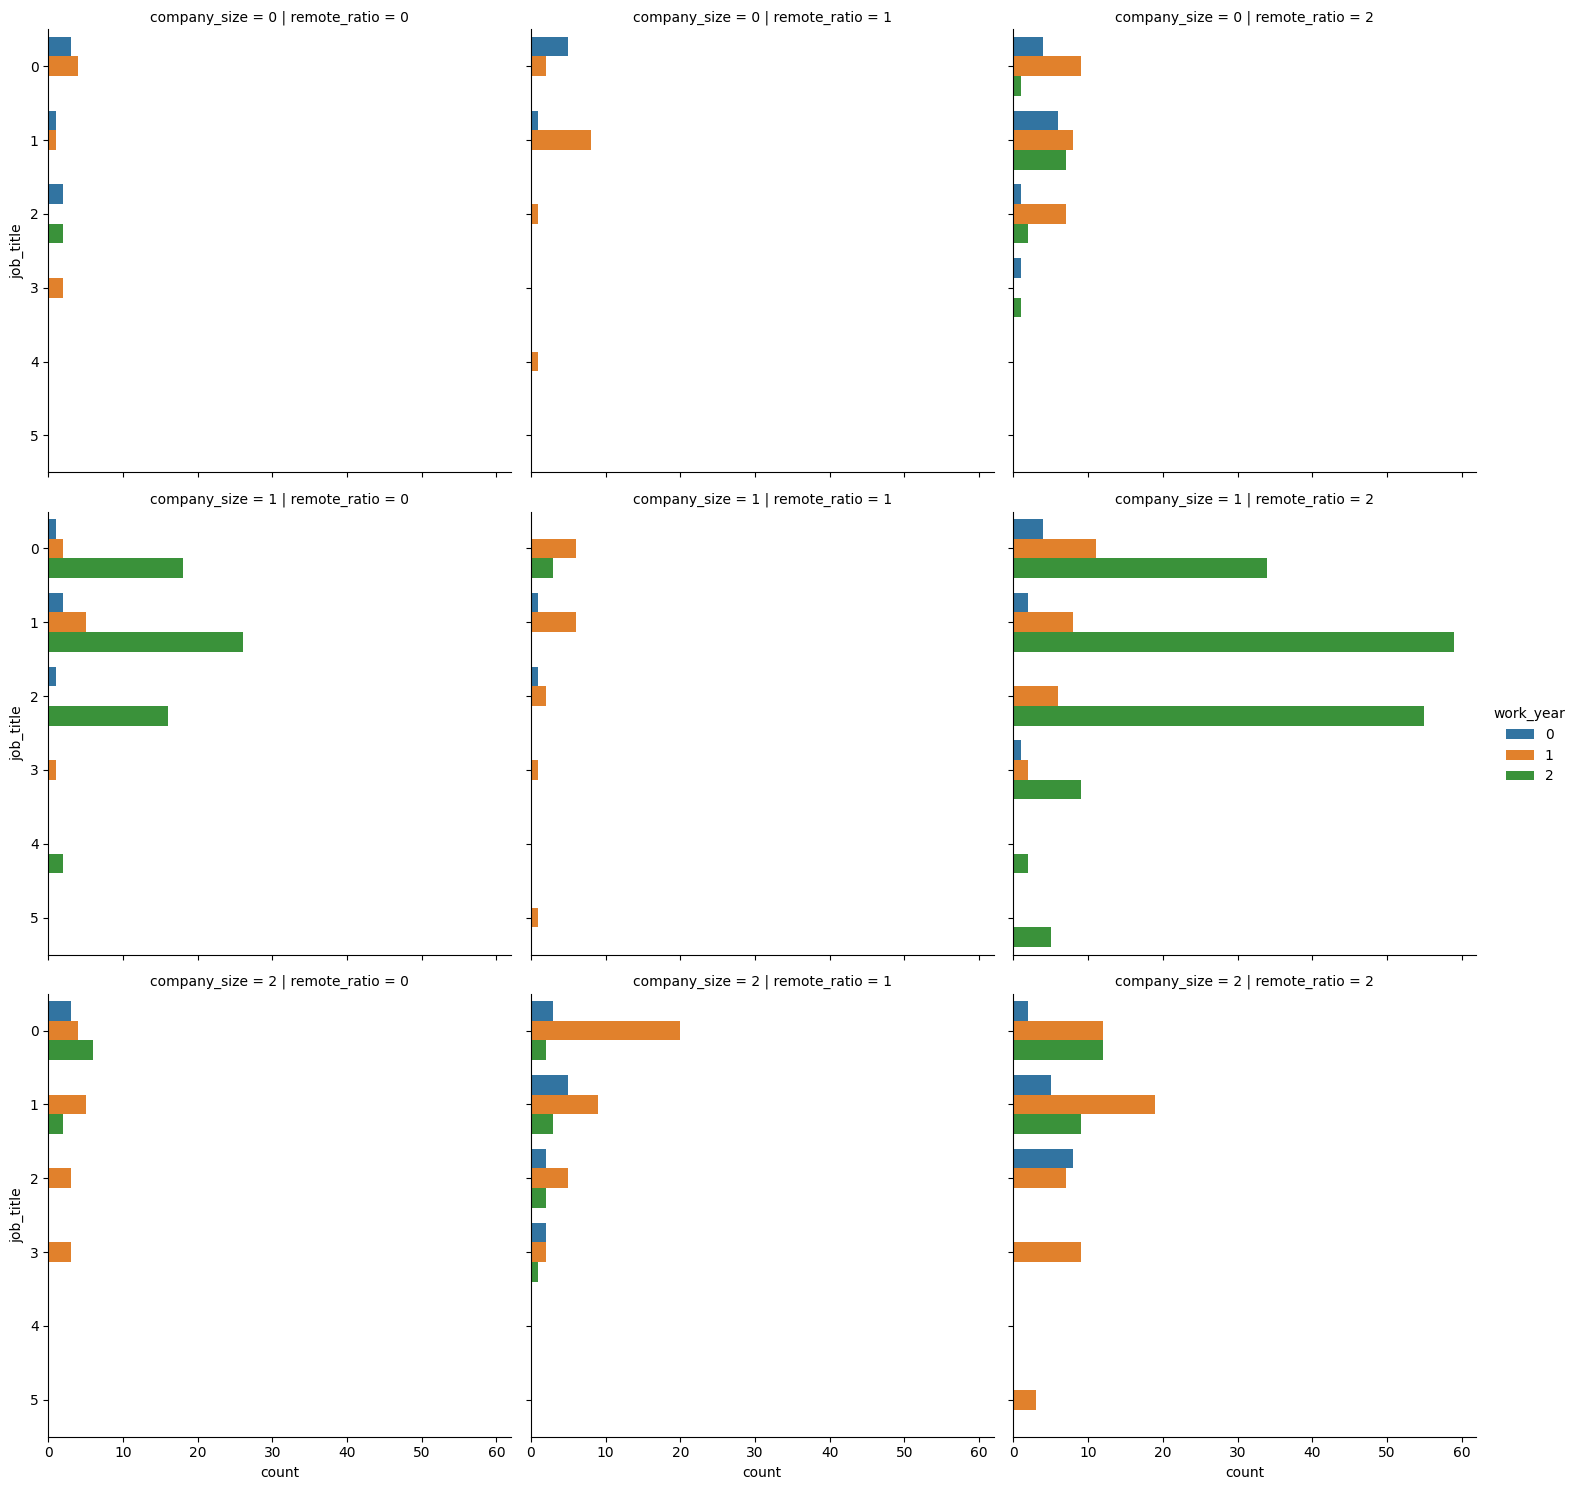

In [63]:
plt.figure()
sns.catplot(kind='count',y='job_title', hue='work_year', row='company_size',col='remote_ratio', data=df)
plt.show()

<Figure size 640x480 with 0 Axes>

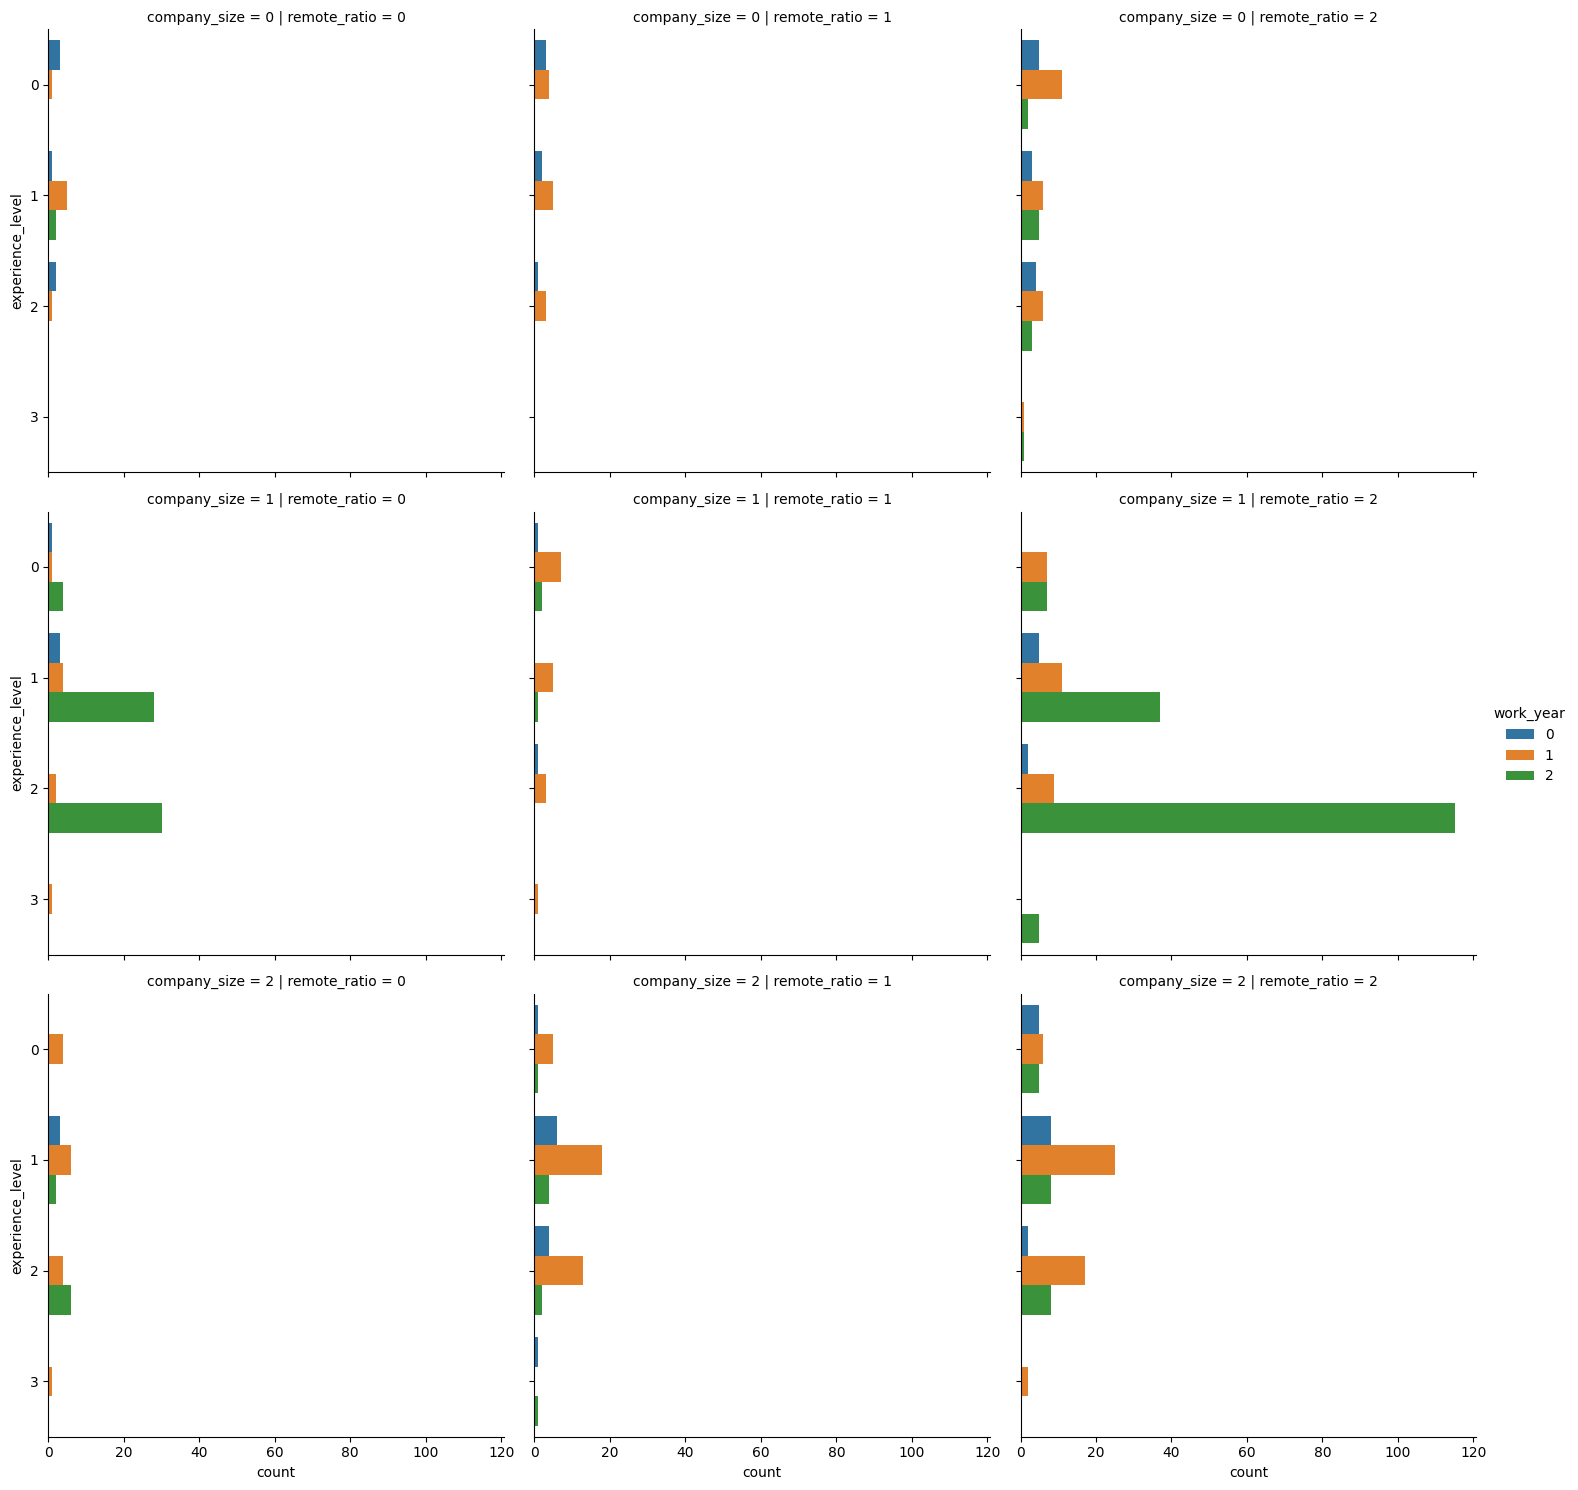

In [64]:
plt.figure()
sns.catplot(kind='count',y='experience_level', hue='work_year', row='company_size',col='remote_ratio', data=df)
plt.show()

<Figure size 640x480 with 0 Axes>

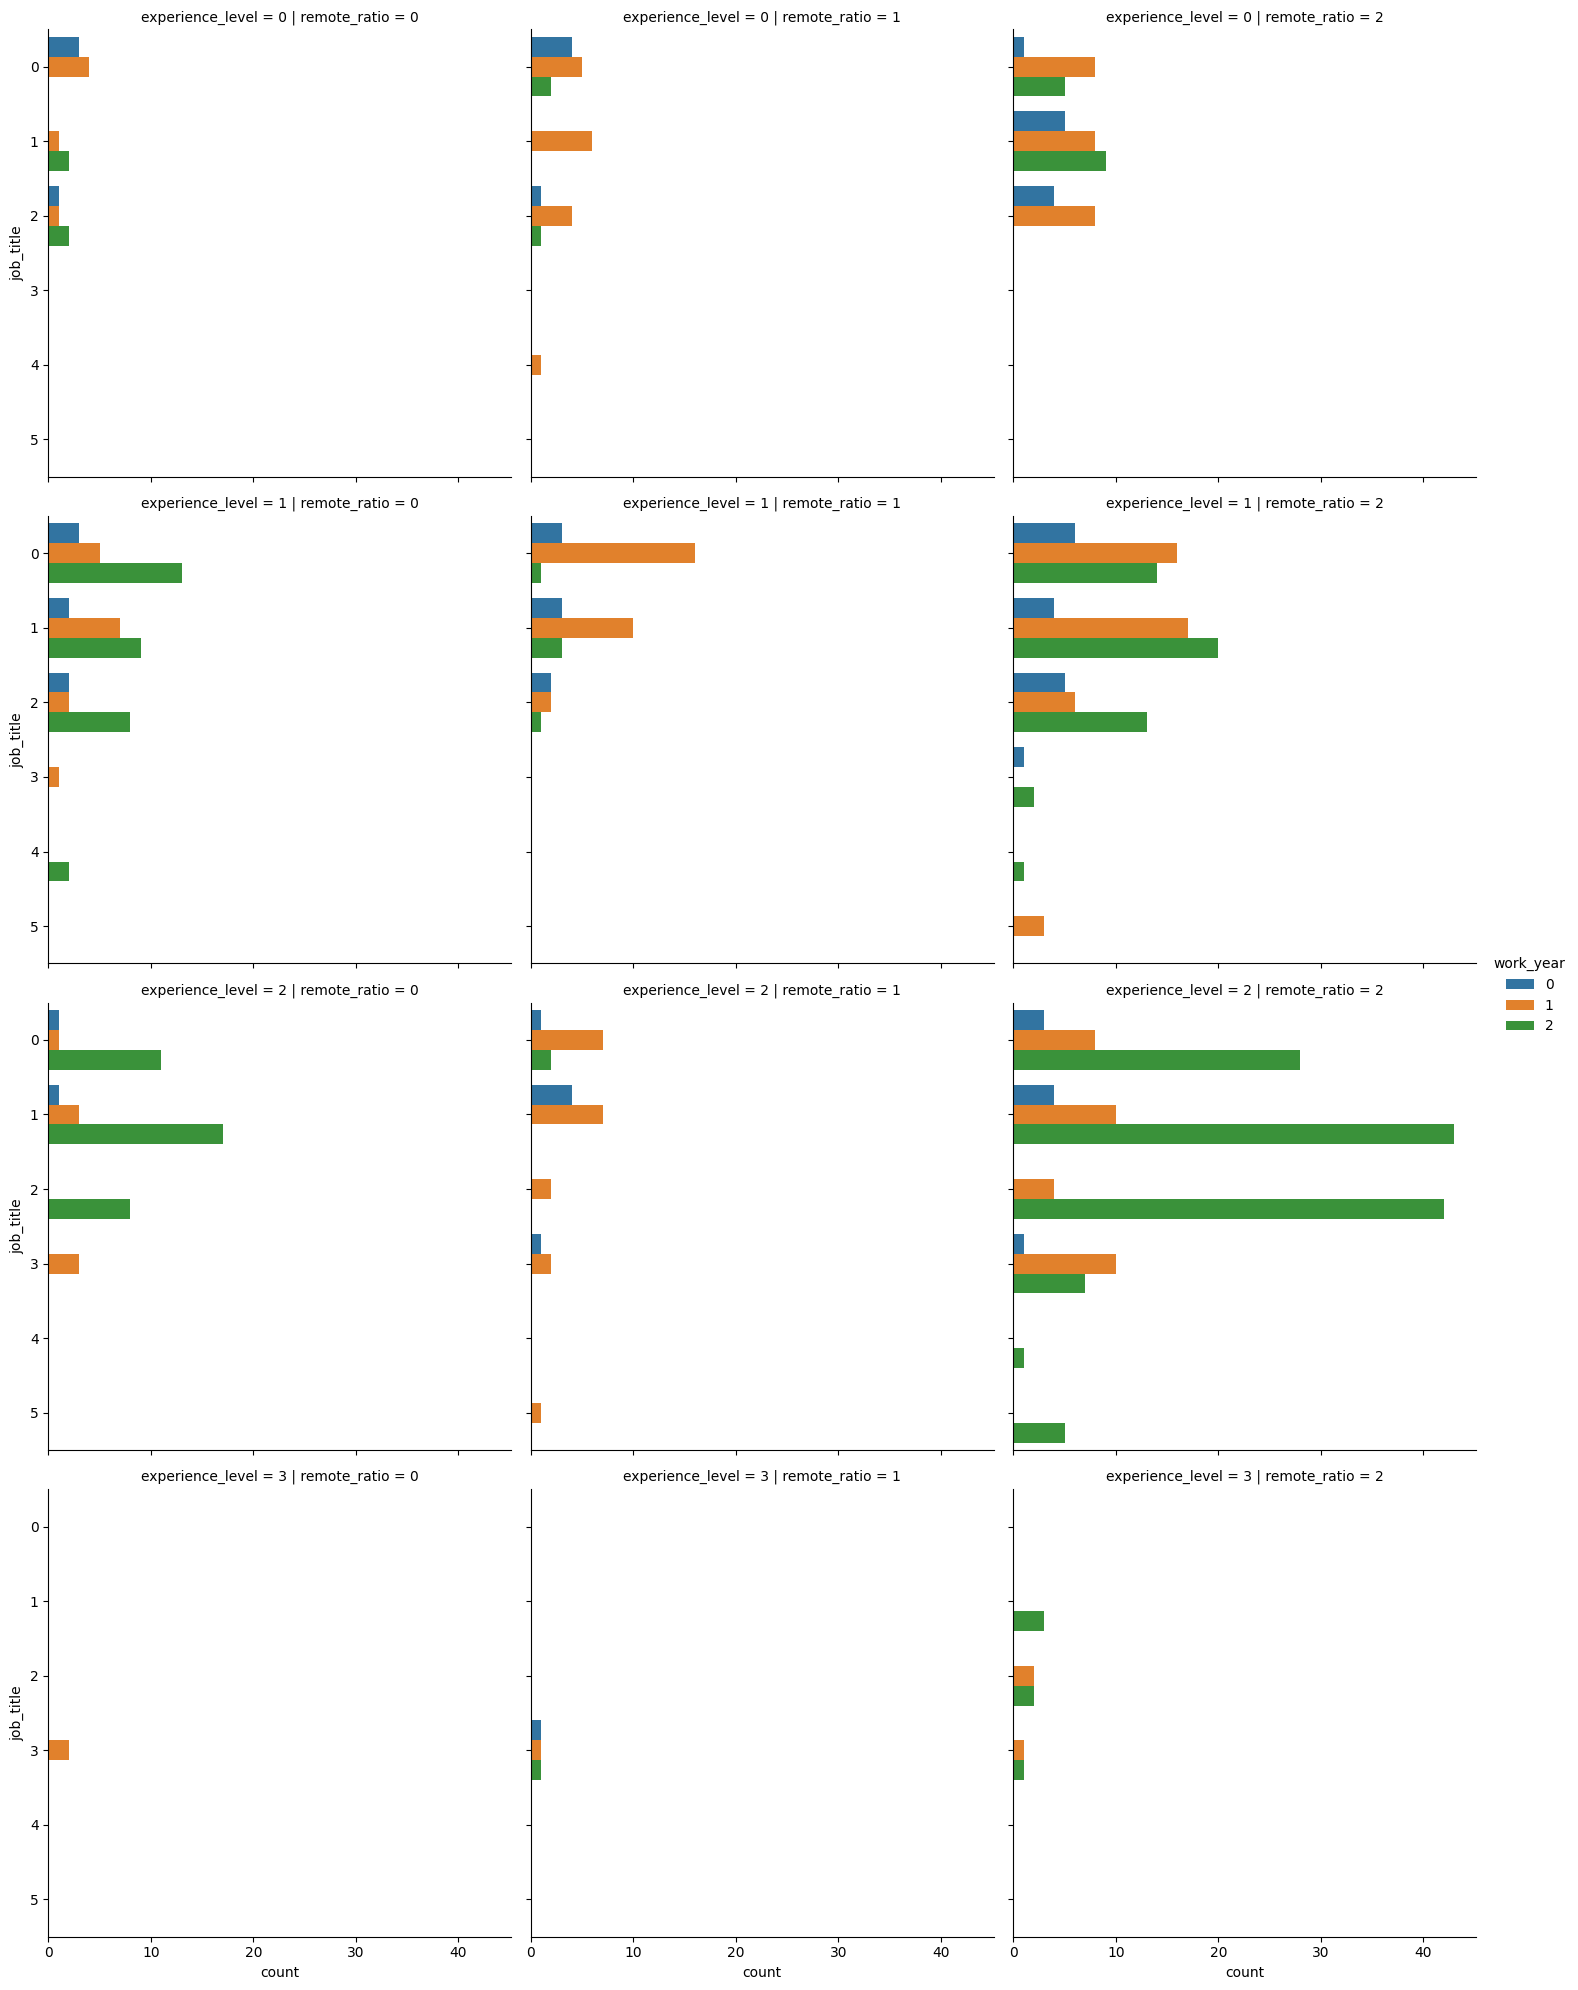

In [65]:
plt.figure()
sns.catplot(kind='count',y='job_title', hue='work_year', row='experience_level',col='remote_ratio', data=df)
plt.show()

### Crosstables

###### Note: Comparisons with the country and residence will not be covered as it will be biased since it will be counted as biased (It is conducted in the US, most of the contributers are in the US)

In [66]:
ctab = pd.crosstab(df['job_title'],df['work_year'])
display(ctab)

work_year,0,1,2
job_title,,,
0,25,70,76
1,23,69,106
2,15,31,77
3,4,20,11
4,0,1,4
5,0,4,5


In [67]:
ctab = pd.crosstab(df['job_title'],df['experience_level'])
display(ctab)

experience_level,0,1,2,3
job_title,,,,
0,32,77,62,0
1,31,75,89,3
2,22,41,56,4
3,0,4,24,7
4,1,3,1,0
5,0,3,6,0


In [68]:
ctab = pd.crosstab(df['job_title'],df['company_size'])
display(ctab)

company_size,0,1,2
job_title,,,
0,28,79,64
1,32,109,57
2,15,81,27
3,4,14,17
4,1,4,0
5,0,6,3


In [69]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 605
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           541 non-null    int64 
 1   experience_level    541 non-null    int64 
 2   employment_type     541 non-null    int64 
 3   job_title           541 non-null    int64 
 4   salary_in_usd       541 non-null    int64 
 5   employee_residence  541 non-null    object
 6   remote_ratio        541 non-null    int64 
 7   company_location    541 non-null    object
 8   company_size        541 non-null    int64 
 9   salary_range        541 non-null    int32 
dtypes: int32(1), int64(7), object(2)
memory usage: 44.4+ KB


None

# Foundings
## Univariate Plots
#### 1- Employement is more in 2022
#### 2- Most employed are Engineers, Scientists, Anaylysts, Respectively
#### 3- Most employed are Senior and Mid levels Full time jobs
#### 4- Remote working is the most common 
#### 5- Medium companies number is higher than large and small companies
#### 6- Medium companies number is higher than large and small companies
#### 7- Architets and Managers has the highest median Salary in USD 
#### 7- Scientists, Engineer and Analysts has approximately the same median Salary in USD, but Engineers and Scientist has a wider range.   

<hr/>

## Bivariate Plots
#### 1- in 2021 and 2022, Mid levels employment is approximately the same
#### 2- in 2022, Senior level is higher than any other experience level
#### 3- Full time jobs is more common than any other employement type in all years
#### 4- in 2022, Analyst and Scientists employment is the approximately the same
#### 5- in 2021, Engineer and Scientists employment is the approximately the same
#### 6- in 2022, Engineer is more common than any other job title
#### 7- in 2022, Remote working is more common than any other type
#### 8- in 2021, Large companies has hired more than Medium and Small companies
#### 9- in 2022, Medium companies has hired more than Large and Small companies with a huge differnece
#### 10- Medium companies has the highest rate of hiring Senior levels
#### 11- Medium companies has the highest rate of working remotley 
#### 12- Scientists and Engineers has approximately the same employment rate in Mid level
#### 13- Large companies has slightly higher Scientiests than Engineers
#### 13- Large companies has slightly higher Scientiests than Engineers
<hr/>

## Advanced Graphs
#### 1- in 2021, Large companies had the highest rate of working remotly
#### 3- in 2022, Medium companies has the highest rate of working remotly 
#### 2- in 2022, Senior levels has the highest rate of working remotly

## Model Building
##### Classification

,work_year,experience_level,employment_type,job_title,remote_ratio,company_size,salary_range
0,0,1,0,0,0,2,0
2,0,2,0,1,1,1,1
3,0,1,0,2,0,0,0
4,0,2,0,1,1,2,1
5,0,0,0,2,2,2,0


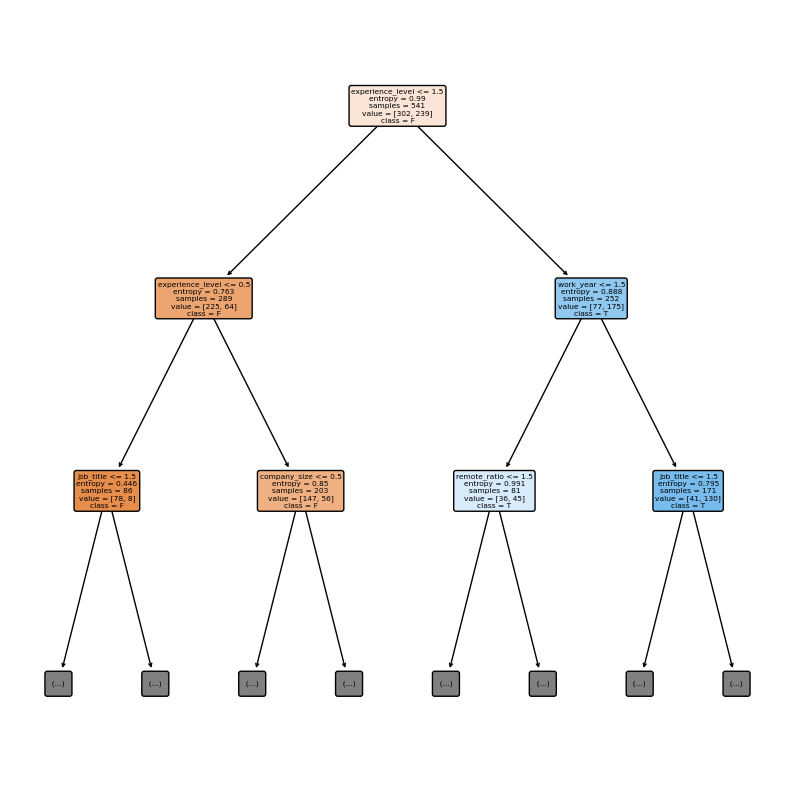

In [79]:
## decision tree starts here

from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='best')

# df.drop(columns=['company_location'], inplace=True)
# df.drop(columns=['employee_residence'], inplace=True)
# df.drop(columns=['salary_in_usd'], inplace=True)
# ndf = pd.get_dummies(df,drop_first=True)

display(df.head())
clf = clf.fit(df.drop('salary_range', axis=1), df['salary_range'])

import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
plot_tree(clf,
          feature_names=df.columns[0:-1],  
          class_names=['F','T'],  
          filled=True,rounded=True, max_depth=2) 

plt.show()

In [81]:
from scipy.stats import entropy

# Calculating the entropy
probs=df['salary_range'].value_counts()/len(df.index) #get probabilities
E_salary=entropy(probs,base=2)
print(f'E(salary_range) = {E_salary: 0.4f}.')

E(salary_range) =  0.9902.


In [82]:
# Calculating the entropy of **salary** given the information of job_title
import numpy as np
from scipy.stats import entropy

split = pd.crosstab(df['salary_range'],df['job_title'])    #get split tables

Split_Probs=split/split.sum()   #get proportions within splits

E_salary_Engineer=entropy(Split_Probs[1],base=2)
E_salary_Scientist=entropy(Split_Probs[0],base=2)
E_salary_Analyst=entropy(Split_Probs[2],base=2)

probs=df['job_title'].value_counts()/len(df.index) #get probabilities

E_salary_job_title =np.average([E_salary_Engineer,E_salary_Scientist,E_salary_Analyst],weights=[probs[1],probs[0],probs[2]])

print(f'E(salary_range|job_title) = {E_salary_job_title: 0.4f}.')


E(salary_range|job_title) =  0.9760.


In [83]:
#4. What is the information gain by knowing **act** along with **inflated**.
IG = E_salary - E_salary_job_title
print(f'The information gain is {IG:0.4f}.')

The information gain is 0.0142.


In [ ]:
## random forest starts here


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

ndf = pd.get_dummies(df,drop_first=True)
rf = RandomForestClassifier(n_estimators=6,criterion='entropy', random_state=0)
rf = rf.fit(ndf.drop('salary_range', axis=1), ndf['salary_range'])


fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=1000)
for index,axis in enumerate(axes.flatten()):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = ndf.columns[0:-1], 
                   class_names=df['job_title'].unique(),
                   filled = True,
                   max_depth=2,
                   ax = axis);

    axis.set_title('Estimator: ' + str(index+1), fontsize = 11)

In [84]:
## naive byes here
display(df['salary_range'].value_counts())
display(df['job_title'].value_counts())

0    302
1    239
Name: salary_range, dtype: int64

1    198
0    171
2    123
3     35
5      9
4      5
Name: job_title, dtype: int64

In [ ]:
pd.crosstab(df['salary_range'], df['job_title'])

In [85]:
import numpy as np

x = df.drop('salary_range',axis=1).values
y = df['salary_range'].values 

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

encoder1 = OrdinalEncoder()
x = encoder1.fit_transform(x)

from sklearn.naive_bayes import CategoricalNB 
NBClf = CategoricalNB(alpha=1.0e-10, class_prior=None, fit_prior=True)  
NBClf.fit(x,y)

classes=encoder.inverse_transform([NBClf.classes_[0], NBClf.classes_[1]]).tolist()

print('\n')
print('Class Assignment:')
print(f'Class 1:= {classes[0]} \t Class 2:= {classes[1]}')




Class Assignment:
Class 1:= 0 	 Class 2:= 1
